In [1]:
import os
import pandas as pd
import numpy as np

from datetime import datetime
from msal import PublicClientApplication

import holidays
from datetime import date

from cognite.client import CogniteClient
from cognite.client.data_classes import TimeSeries, Asset

In [2]:
# Log-in detaljer
TENANT_ID = os.getenv("AZURE_TENANT_ID")
CLIENT_ID = os.getenv("AZURE_CLIENT_ID")
CDF_CLUSTER = "az-power-no-northeurope"
COGNITE_PROJECT = "heco-dev"

# Code to log-in WIHTOUT client_secret
SCOPES = [f"https://{CDF_CLUSTER}.cognitedata.com/.default"]

AUTHORITY_HOST_URI = "https://login.microsoftonline.com"
AUTHORITY_URI = AUTHORITY_HOST_URI + "/" + TENANT_ID
PORT = 53000


def authenticate_azure():

    app = PublicClientApplication(client_id=CLIENT_ID, authority=AUTHORITY_URI)

    # interactive login - make sure you have http://localhost:port in Redirect URI in App Registration as type "Mobile and desktop applications"
    creds = app.acquire_token_interactive(scopes=SCOPES, port=PORT)
    return creds


creds = authenticate_azure()

client = CogniteClient(
    token_url=creds["id_token_claims"]["iss"],
    token=creds["access_token"],
    token_client_id=creds["id_token_claims"]["aud"],
    project=COGNITE_PROJECT,
    base_url=f"https://{CDF_CLUSTER}.cognitedata.com",
    client_name="cognite-python-dev",
)


In [3]:

#Definer ønsket kruver
curves = ["NO1_consumption_per_15min",
"NO1_temperature_per_15min",
"NO1_el_price_per_hour",
"NO1_cloud_coverage_per_15min"
]

#Definer start dato
start_dato = datetime(2015,1,1)
slutt_dato = datetime(2020,1,1)

df_watt = pd.DataFrame()
for curve in curves:
    print(curve)
    hm = client.datapoints.retrieve_dataframe(
        start=start_dato,
        end=slutt_dato,
        aggregates=["average"],
        granularity="1h",
        id=client.time_series.retrieve(external_id=curve).id,)
    df_watt = pd.merge(df_watt, hm, left_index=True, right_index=True, how="outer")

NO1_consumption_per_15min
NO1_temperature_per_15min
NO1_el_price_per_hour
NO1_cloud_coverage_per_15min


In [4]:
start_val = datetime(2020,1,1)
end_val = datetime(2020,1,3)

df_val = pd.DataFrame()
for curve in curves:
    print(curve)
    hm = client.datapoints.retrieve_dataframe(
        start=start_val,
        end=end_val,
        aggregates=["average"],
        granularity="1h",
        id=client.time_series.retrieve(external_id=curve).id,)
    df_val = pd.merge(df_val, hm, left_index=True, right_index=True, how="outer")

df_val

NO1_consumption_per_15min
NO1_temperature_per_15min
NO1_el_price_per_hour
NO1_cloud_coverage_per_15min


5172002421720946|average  5710260593215257|average  \
2020-01-01 00:00:00               4350.041892                    2.7250   
2020-01-01 01:00:00               4266.511372                    3.6000   
2020-01-01 02:00:00               4191.281309                    3.5875   
2020-01-01 03:00:00               4181.534648                    3.4500   
2020-01-01 04:00:00               4272.687905                    3.0625   
2020-01-01 05:00:00               4452.131012                    2.7625   
2020-01-01 06:00:00               4582.773277                    2.4875   
2020-01-01 07:00:00               4684.506603                    2.4000   
2020-01-01 08:00:00               4794.121734                    2.4125   
2020-01-01 09:00:00               4951.234053                    2.5375   
2020-01-01 10:00:00               5098.721935                    2.8375   
2020-01-01 11:00:00               5139.285449                    3.1250   
2020-01-01 12:00:00               5162.303816                    3.2625   
2020-01-01 13:00:00               5238.023255                    2.9500   
2020-01-01 14:00:00               5341.256555                    2.5625   
2020-01-01 15:00:00               5455.111291                    2.2875   
2020-01-01 16:00:00               5446.285517                    2.1875   
2020-01-01 17:00:00               5390.901459                    2.1375   
2020-01-01 18:00:00               5300.449244                    2.3750   
2020-01-01 19:00:00               5153.084451                    2.1875   
2020-01-01 20:00:00               5003.402058                    2.1375   
2020-01-01 21:00:00               4820.647680                    2.3875   
2020-01-01 22:00:00               4597.403212                    2.3250   
2020-01-01 23:00:00               4408.728882                    2.5125   
2020-01-02 00:00:00               4256.874575                    2.5875   
2020-01-02 01:00:00               4207.245693                    2.4750   
2020-01-02 02:00:00               4196.784434                    2.2750   
2020-01-02 03:00:00               4230.102097                    2.1000   
2020-01-02 04:00:00               4404.229640                    2.1000   
2020-01-02 05:00:00               4902.645894                    2.1125   
2020-01-02 06:00:00               5354.826760                    2.2125   
2020-01-02 07:00:00               5537.499103                    2.3375   
2020-01-02 08:00:00               5577.279173                    2.6750   
2020-01-02 09:00:00               5571.170826                    3.2750   
2020-01-02 10:00:00               5510.106712                    3.8625   
2020-01-02 11:00:00               5457.222181                    4.3250   
2020-01-02 12:00:00               5421.296081                    4.4875   
2020-01-02 13:00:00               5464.710874                    4.3625   
2020-01-02 14:00:00               5588.776659                    4.0875   
2020-01-02 15:00:00               5690.286240                    4.0375   
2020-01-02 16:00:00               5607.321072                    4.3500   
2020-01-02 17:00:00               5478.965842                    4.7625   
2020-01-02 18:00:00               5340.437528                    5.2375   
2020-01-02 19:00:00               5211.683885                    5.5125   
2020-01-02 20:00:00               4963.040619                    5.6125   
2020-01-02 21:00:00               4692.426755                    5.7125   
2020-01-02 22:00:00               4421.470953                    5.8125   
2020-01-02 23:00:00               4187.463047                    5.9000   

                     1205125514944434|average  6120682182410704|average  
2020-01-01 00:00:00                     31.77                   1.00000  
2020-01-01 01:00:00                     31.57                   1.00000  
2020-01-01 02:00:00                     31.28                   1.00000  
2020-01-01 03:00:00                     30.72    

In [5]:
no_holidays = holidays.NO()
periods = pd.date_range(start_dato, slutt_dato, freq="H")
d = np.zeros(len(periods))
e = np.zeros(len(periods))

for l in range(len(periods)):
    a = str(int(periods[l].strftime('%Y%m%d')))

    da = int(a[-2:])
    mo = int(a[-4:-2])
    yr = int(a[-8:-4])
    if date(yr,mo,da) in no_holidays:
        d[l] = 1
    if date(yr,mo,da).weekday() > 4:
        e[l] = 1

df = pd.DataFrame(d,index=[i for i in periods],columns=['holiday?'])
ef = pd.DataFrame(e,index=[i for i in periods],columns=['weekend?'])

df_watt = pd.merge(df_watt, df, left_index=True, right_index=True, how='outer')
df_watt = pd.merge(df_watt, ef, left_index=True, right_index=True, how='outer')


In [6]:
val_periods = pd.date_range(start_val, end_val, freq="H")
d = np.zeros(len(val_periods))
e = np.zeros(len(val_periods))

for l in range(len(val_periods)):
    a = str(int(val_periods[l].strftime('%Y%m%d')))

    da = int(a[-2:])
    mo = int(a[-4:-2])
    yr = int(a[-8:-4])
    if date(yr,mo,da) in no_holidays:
        d[l] = 1
    if date(yr,mo,da).weekday() > 4:
        e[l] = 1

df = pd.DataFrame(d,index=[i for i in val_periods],columns=['holiday?'])
ef = pd.DataFrame(e,index=[i for i in val_periods],columns=['weekend?'])

df_val = pd.merge(df_val, df, left_index=True, right_index=True, how='outer')
df_val = pd.merge(df_val, ef, left_index=True, right_index=True, how='outer')
df_val

5172002421720946|average  5710260593215257|average  \
2020-01-01 00:00:00               4350.041892                    2.7250   
2020-01-01 01:00:00               4266.511372                    3.6000   
2020-01-01 02:00:00               4191.281309                    3.5875   
2020-01-01 03:00:00               4181.534648                    3.4500   
2020-01-01 04:00:00               4272.687905                    3.0625   
2020-01-01 05:00:00               4452.131012                    2.7625   
2020-01-01 06:00:00               4582.773277                    2.4875   
2020-01-01 07:00:00               4684.506603                    2.4000   
2020-01-01 08:00:00               4794.121734                    2.4125   
2020-01-01 09:00:00               4951.234053                    2.5375   
2020-01-01 10:00:00               5098.721935                    2.8375   
2020-01-01 11:00:00               5139.285449                    3.1250   
2020-01-01 12:00:00               5162.303816                    3.2625   
2020-01-01 13:00:00               5238.023255                    2.9500   
2020-01-01 14:00:00               5341.256555                    2.5625   
2020-01-01 15:00:00               5455.111291                    2.2875   
2020-01-01 16:00:00               5446.285517                    2.1875   
2020-01-01 17:00:00               5390.901459                    2.1375   
2020-01-01 18:00:00               5300.449244                    2.3750   
2020-01-01 19:00:00               5153.084451                    2.1875   
2020-01-01 20:00:00               5003.402058                    2.1375   
2020-01-01 21:00:00               4820.647680                    2.3875   
2020-01-01 22:00:00               4597.403212                    2.3250   
2020-01-01 23:00:00               4408.728882                    2.5125   
2020-01-02 00:00:00               4256.874575                    2.5875   
2020-01-02 01:00:00               4207.245693                    2.4750   
2020-01-02 02:00:00               4196.784434                    2.2750   
2020-01-02 03:00:00               4230.102097                    2.1000   
2020-01-02 04:00:00               4404.229640                    2.1000   
2020-01-02 05:00:00               4902.645894                    2.1125   
2020-01-02 06:00:00               5354.826760                    2.2125   
2020-01-02 07:00:00               5537.499103                    2.3375   
2020-01-02 08:00:00               5577.279173                    2.6750   
2020-01-02 09:00:00               5571.170826                    3.2750   
2020-01-02 10:00:00               5510.106712                    3.8625   
2020-01-02 11:00:00               5457.222181                    4.3250   
2020-01-02 12:00:00               5421.296081                    4.4875   
2020-01-02 13:00:00               5464.710874                    4.3625   
2020-01-02 14:00:00               5588.776659                    4.0875   
2020-01-02 15:00:00               5690.286240                    4.0375   
2020-01-02 16:00:00               5607.321072                    4.3500   
2020-01-02 17:00:00               5478.965842                    4.7625   
2020-01-02 18:00:00               5340.437528                    5.2375   
2020-01-02 19:00:00               5211.683885                    5.5125   
2020-01-02 20:00:00               4963.040619                    5.6125   
2020-01-02 21:00:00               4692.426755                    5.7125   
2020-01-02 22:00:00               4421.470953                    5.8125   
2020-01-02 23:00:00               4187.463047                    5.9000   
2020-01-03 00:00:00                       NaN                       NaN   

                     1205125514944434|average  6120682182410704|average  \
2020-01-01 00:00:00                     31.77                   1.00000   
2020-01-01 01:00:00                     31.57                   1.00000   
2020-01-01 02:00:00                     31.28

In [7]:
df_watt.columns = ["cons_actual","temp_forecast", "price_forecast", "cc_forecast", "holiday", "weekend"]
df_val.columns = ["cons_actual","temp_forecast", "price_forecast", "cc_forecast", "holiday", "weekend"]
df_watt.tail(3)

cons_actual  temp_forecast  price_forecast  cc_forecast  \
2019-12-31 22:00:00  4497.999455         1.7875           32.56      0.95375   
2019-12-31 23:00:00  4385.891137         2.4250           31.82      0.98250   
2020-01-01 00:00:00          NaN            NaN             NaN          NaN   

                     holiday  weekend  
2019-12-31 22:00:00      0.0      0.0  
2019-12-31 23:00:00      0.0      0.0  
2020-01-01 00:00:00      1.0      0.0

## Preprocessing

In [8]:
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [9]:
df_watt['Seconds'] = df_watt.index.map(pd.Timestamp.timestamp)
day = 60*60*24
year = 365.2425*day
week = day*7

df_watt['Day sin'] = np.sin(df_watt['Seconds'] * (2* np.pi / day))
df_watt['Day cos'] = np.cos(df_watt['Seconds'] * (2 * np.pi / day))
df_watt['Week sin'] = np.sin(df_watt['Seconds'] * (2 * np.pi / week))
df_watt['Week cos'] = np.cos(df_watt['Seconds'] * (2 * np.pi / week))
df_watt['Year sin'] = np.sin(df_watt['Seconds'] * (2 * np.pi / year))
df_watt['Year cos'] = np.cos(df_watt['Seconds'] * (2 * np.pi / year))

df_watt=df_watt.drop(['Seconds'], axis=1)
df_watt

cons_actual  temp_forecast  price_forecast  cc_forecast  \
2015-01-01 00:00:00  4678.090390        -1.2875           27.07      0.62750   
2015-01-01 01:00:00  4574.095914        -1.2125           26.93      0.76875   
2015-01-01 02:00:00  4498.004329        -1.2625           26.83      0.90750   
2015-01-01 03:00:00  4480.165823        -1.0250           26.81      0.95750   
2015-01-01 04:00:00  4540.027045        -1.2250           26.97      0.93750   
...                          ...            ...             ...          ...   
2019-12-31 20:00:00  4849.201915         0.2000           33.17      0.89375   
2019-12-31 21:00:00  4630.939229         1.0000           32.75      0.92375   
2019-12-31 22:00:00  4497.999455         1.7875           32.56      0.95375   
2019-12-31 23:00:00  4385.891137         2.4250           31.82      0.98250   
2020-01-01 00:00:00          NaN            NaN             NaN          NaN   

                     holiday  weekend       Day sin   Day cos      Week sin  \
2015-01-01 00:00:00      1.0      0.0  1.232357e-12  1.000000 -6.035158e-13   
2015-01-01 01:00:00      1.0      0.0  2.588190e-01  0.965926  3.739119e-02   
2015-01-01 02:00:00      1.0      0.0  5.000000e-01  0.866025  7.473009e-02   
2015-01-01 03:00:00      1.0      0.0  7.071068e-01  0.707107  1.119645e-01   
2015-01-01 04:00:00      1.0      0.0  8.660254e-01  0.500000  1.490423e-01   
...                      ...      ...           ...       ...           ...   
2019-12-31 20:00:00      0.0      0.0 -8.660254e-01  0.500000 -8.660254e-01   
2019-12-31 21:00:00      0.0      0.0 -7.071068e-01  0.707107 -8.467242e-01   
2019-12-31 22:00:00      0.0      0.0 -5.000000e-01  0.866025 -8.262388e-01   
2019-12-31 23:00:00      0.0      0.0 -2.588190e-01  0.965926 -8.045978e-01   
2020-01-01 00:00:00      1.0      0.0 -7.670342e-12  1.000000 -7.818315e-01   

                     Week cos  Year sin  Year cos  
2015-01-01 00:00:00  1.000000  0.001505  0.999999  
2015-01-01 01:00:00  0.999301  0.002222  0.999998  
2015-01-01 02:00:00  0.997204  0.002939  0.999996  
2015-01-01 03:00:00  0.993712  0.003656  0.999993  
2015-01-01 04:00:00  0.988831  0.004372  0.999990  
...                       ...       ...       ...  
2019-12-31 20:00:00  0.500000 -0.005017  0.999987  
2019-12-31 21:00:00  0.532032 -0.004301  0.999991  
2019-12-31 22:00:00  0.563320 -0.003584  0.999994  
2019-12-31 23:00:00  0.593820 -0.002867  0.999996  
2020-01-01 00:00:00  0.623490 -0.002150  0.999998  

[43825 rows x 12 columns]

In [10]:
df_val['Seconds'] = df_val.index.map(pd.Timestamp.timestamp)
day = 60*60*24
year = 365.2425*day
week = day*7

df_val['Day sin'] = np.sin(df_val['Seconds'] * (2* np.pi / day))
df_val['Day cos'] = np.cos(df_val['Seconds'] * (2 * np.pi / day))
df_val['Week sin'] = np.sin(df_val['Seconds'] * (2 * np.pi / week))
df_val['Week cos'] = np.cos(df_val['Seconds'] * (2 * np.pi / week))
df_val['Year sin'] = np.sin(df_val['Seconds'] * (2 * np.pi / year))
df_val['Year cos'] = np.cos(df_val['Seconds'] * (2 * np.pi / year))

df_val=df_val.drop(['Seconds'], axis=1)
df_val

cons_actual  temp_forecast  price_forecast  cc_forecast  \
2020-01-01 00:00:00  4350.041892         2.7250           31.77      1.00000   
2020-01-01 01:00:00  4266.511372         3.6000           31.57      1.00000   
2020-01-01 02:00:00  4191.281309         3.5875           31.28      1.00000   
2020-01-01 03:00:00  4181.534648         3.4500           30.72      0.99875   
2020-01-01 04:00:00  4272.687905         3.0625           30.27      0.98875   
2020-01-01 05:00:00  4452.131012         2.7625           30.17      0.98000   
2020-01-01 06:00:00  4582.773277         2.4875           30.14      0.98125   
2020-01-01 07:00:00  4684.506603         2.4000           30.49      0.99125   
2020-01-01 08:00:00  4794.121734         2.4125           30.59      1.00000   
2020-01-01 09:00:00  4951.234053         2.5375           30.27      1.00000   
2020-01-01 10:00:00  5098.721935         2.8375           30.34      1.00000   
2020-01-01 11:00:00  5139.285449         3.1250           30.59      1.00000   
2020-01-01 12:00:00  5162.303816         3.2625           30.38      1.00000   
2020-01-01 13:00:00  5238.023255         2.9500           30.60      1.00000   
2020-01-01 14:00:00  5341.256555         2.5625           31.09      0.99875   
2020-01-01 15:00:00  5455.111291         2.2875           31.53      0.99000   
2020-01-01 16:00:00  5446.285517         2.1875           31.78      0.98875   
2020-01-01 17:00:00  5390.901459         2.1375           31.64      0.98000   
2020-01-01 18:00:00  5300.449244         2.3750           31.44      0.98125   
2020-01-01 19:00:00  5153.084451         2.1875           31.35      0.99125   
2020-01-01 20:00:00  5003.402058         2.1375           31.07      1.00000   
2020-01-01 21:00:00  4820.647680         2.3875           30.96      0.99875   
2020-01-01 22:00:00  4597.403212         2.3250           30.61      0.99000   
2020-01-01 23:00:00  4408.728882         2.5125           30.78      0.98875   
2020-01-02 00:00:00  4256.874575         2.5875           30.64      0.98000   
2020-01-02 01:00:00  4207.245693         2.4750           30.43      0.98000   
2020-01-02 02:00:00  4196.784434         2.2750           29.84      0.98000   
2020-01-02 03:00:00  4230.102097         2.1000           29.90      0.98125   
2020-01-02 04:00:00  4404.229640         2.1000           30.44      0.99000   
2020-01-02 05:00:00  4902.645894         2.1125           31.68      0.98750   
2020-01-02 06:00:00  5354.826760         2.2125           31.79      0.96250   
2020-01-02 07:00:00  5537.499103         2.3375           31.83      0.90250   
2020-01-02 08:00:00  5577.279173         2.6750           31.74      0.83125   
2020-01-02 09:00:00  5571.170826         3.2750           31.63      0.67000   
2020-01-02 10:00:00  5510.106712         3.8625           31.32      0.43000   
2020-01-02 11:00:00  5457.222181         4.3250           31.07      0.20750   
2020-01-02 12:00:00  5421.296081         4.4875           31.06      0.12375   
2020-01-02 13:00:00  5464.710874         4.3625           31.07      0.15375   
2020-01-02 14:00:00  5588.776659         4.0875           31.26      0.19750   
2020-01-02 15:00:00  5690.286240         4.0375           31.41      0.35250   
2020-01-02 16:00:00  5607.321072         4.3500           31.40      0.61250   
2020-01-02 17:00:00  5478.965842         4.7625           31.10      0.85625   
2020-01-02 18:00:00  5340.437528         5.2375           30.75      0.97125   
2020-01-02 19:00:00  5211.683885         5.5125           30.47      0.98000   
2020-01-02 20:00:00  4963.040619         5.6125           30.10      0.98125   
2020-01-02 21:00:00  4692.426755         5.7125           29.71      0.99000   
2020-01-02 22:00:00  4421.470953         5.8125           28.32      0.99125   
2020-01-02 23:00:00  4187.463047         5.9000           28.35      1.00000   
2020-01-03 00:00:00          NaN            NaN             NaN          NaN   

                    

In [11]:
df_watt_copy = df_watt
df_watt.dropna(inplace=True)
df_val.dropna(inplace=True)
df_watt

cons_actual  temp_forecast  price_forecast  cc_forecast  \
2015-01-01 00:00:00  4678.090390        -1.2875           27.07      0.62750   
2015-01-01 01:00:00  4574.095914        -1.2125           26.93      0.76875   
2015-01-01 02:00:00  4498.004329        -1.2625           26.83      0.90750   
2015-01-01 03:00:00  4480.165823        -1.0250           26.81      0.95750   
2015-01-01 04:00:00  4540.027045        -1.2250           26.97      0.93750   
...                          ...            ...             ...          ...   
2019-12-31 19:00:00  5061.686431        -0.3375           33.54      0.85500   
2019-12-31 20:00:00  4849.201915         0.2000           33.17      0.89375   
2019-12-31 21:00:00  4630.939229         1.0000           32.75      0.92375   
2019-12-31 22:00:00  4497.999455         1.7875           32.56      0.95375   
2019-12-31 23:00:00  4385.891137         2.4250           31.82      0.98250   

                     holiday  weekend       Day sin   Day cos      Week sin  \
2015-01-01 00:00:00      1.0      0.0  1.232357e-12  1.000000 -6.035158e-13   
2015-01-01 01:00:00      1.0      0.0  2.588190e-01  0.965926  3.739119e-02   
2015-01-01 02:00:00      1.0      0.0  5.000000e-01  0.866025  7.473009e-02   
2015-01-01 03:00:00      1.0      0.0  7.071068e-01  0.707107  1.119645e-01   
2015-01-01 04:00:00      1.0      0.0  8.660254e-01  0.500000  1.490423e-01   
...                      ...      ...           ...       ...           ...   
2019-12-31 19:00:00      0.0      0.0 -9.659258e-01  0.258819 -8.841154e-01   
2019-12-31 20:00:00      0.0      0.0 -8.660254e-01  0.500000 -8.660254e-01   
2019-12-31 21:00:00      0.0      0.0 -7.071068e-01  0.707107 -8.467242e-01   
2019-12-31 22:00:00      0.0      0.0 -5.000000e-01  0.866025 -8.262388e-01   
2019-12-31 23:00:00      0.0      0.0 -2.588190e-01  0.965926 -8.045978e-01   

                     Week cos  Year sin  Year cos  
2015-01-01 00:00:00  1.000000  0.001505  0.999999  
2015-01-01 01:00:00  0.999301  0.002222  0.999998  
2015-01-01 02:00:00  0.997204  0.002939  0.999996  
2015-01-01 03:00:00  0.993712  0.003656  0.999993  
2015-01-01 04:00:00  0.988831  0.004372  0.999990  
...                       ...       ...       ...  
2019-12-31 19:00:00  0.467269 -0.005734  0.999984  
2019-12-31 20:00:00  0.500000 -0.005017  0.999987  
2019-12-31 21:00:00  0.532032 -0.004301  0.999991  
2019-12-31 22:00:00  0.563320 -0.003584  0.999994  
2019-12-31 23:00:00  0.593820 -0.002867  0.999996  

[43812 rows x 12 columns]

In [12]:
train_cols = list(df_watt)[1:]
#New dataframe with only training data - 4 columns
df_for_training = df_watt[train_cols].astype(float)
df_for_training

temp_forecast  price_forecast  cc_forecast  holiday  \
2015-01-01 00:00:00        -1.2875           27.07      0.62750      1.0   
2015-01-01 01:00:00        -1.2125           26.93      0.76875      1.0   
2015-01-01 02:00:00        -1.2625           26.83      0.90750      1.0   
2015-01-01 03:00:00        -1.0250           26.81      0.95750      1.0   
2015-01-01 04:00:00        -1.2250           26.97      0.93750      1.0   
...                            ...             ...          ...      ...   
2019-12-31 19:00:00        -0.3375           33.54      0.85500      0.0   
2019-12-31 20:00:00         0.2000           33.17      0.89375      0.0   
2019-12-31 21:00:00         1.0000           32.75      0.92375      0.0   
2019-12-31 22:00:00         1.7875           32.56      0.95375      0.0   
2019-12-31 23:00:00         2.4250           31.82      0.98250      0.0   

                     weekend       Day sin   Day cos      Week sin  Week cos  \
2015-01-01 00:00:00      0.0  1.232357e-12  1.000000 -6.035158e-13  1.000000   
2015-01-01 01:00:00      0.0  2.588190e-01  0.965926  3.739119e-02  0.999301   
2015-01-01 02:00:00      0.0  5.000000e-01  0.866025  7.473009e-02  0.997204   
2015-01-01 03:00:00      0.0  7.071068e-01  0.707107  1.119645e-01  0.993712   
2015-01-01 04:00:00      0.0  8.660254e-01  0.500000  1.490423e-01  0.988831   
...                      ...           ...       ...           ...       ...   
2019-12-31 19:00:00      0.0 -9.659258e-01  0.258819 -8.841154e-01  0.467269   
2019-12-31 20:00:00      0.0 -8.660254e-01  0.500000 -8.660254e-01  0.500000   
2019-12-31 21:00:00      0.0 -7.071068e-01  0.707107 -8.467242e-01  0.532032   
2019-12-31 22:00:00      0.0 -5.000000e-01  0.866025 -8.262388e-01  0.563320   
2019-12-31 23:00:00      0.0 -2.588190e-01  0.965926 -8.045978e-01  0.593820   

                     Year sin  Year cos  
2015-01-01 00:00:00  0.001505  0.999999  
2015-01-01 01:00:00  0.002222  0.999998  
2015-01-01 02:00:00  0.002939  0.999996  
2015-01-01 03:00:00  0.003656  0.999993  
2015-01-01 04:00:00  0.004372  0.999990  
...                       ...       ...  
2019-12-31 19:00:00 -0.005734  0.999984  
2019-12-31 20:00:00 -0.005017  0.999987  
2019-12-31 21:00:00 -0.004301  0.999991  
2019-12-31 22:00:00 -0.003584  0.999994  
2019-12-31 23:00:00 -0.002867  0.999996  

[43812 rows x 11 columns]

In [13]:
X = df_watt[train_cols]
y = df_watt['cons_actual']


#train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=None) #change random_state if you want to split randomly

In [14]:
#Tuning
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
model = XGBRegressor()
random_search = RandomizedSearchCV(model, param_distributions= params, n_iter = 100, scoring="neg_mean_squared_error", n_jobs=3, verbose=3)
random_search.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
print(random_search.best_estimator_)
print(random_search.best_params_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0.4, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.15, max_delta_step=0,
             max_depth=4, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
{'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.7}


In [ ]:
def split_validation_set(df):
    return df[train_cols], df['cons_actual']

In [ ]:
x_val, y_val = split_validation_set(df_val)
xgb_pred = random_search.predict(x_val)

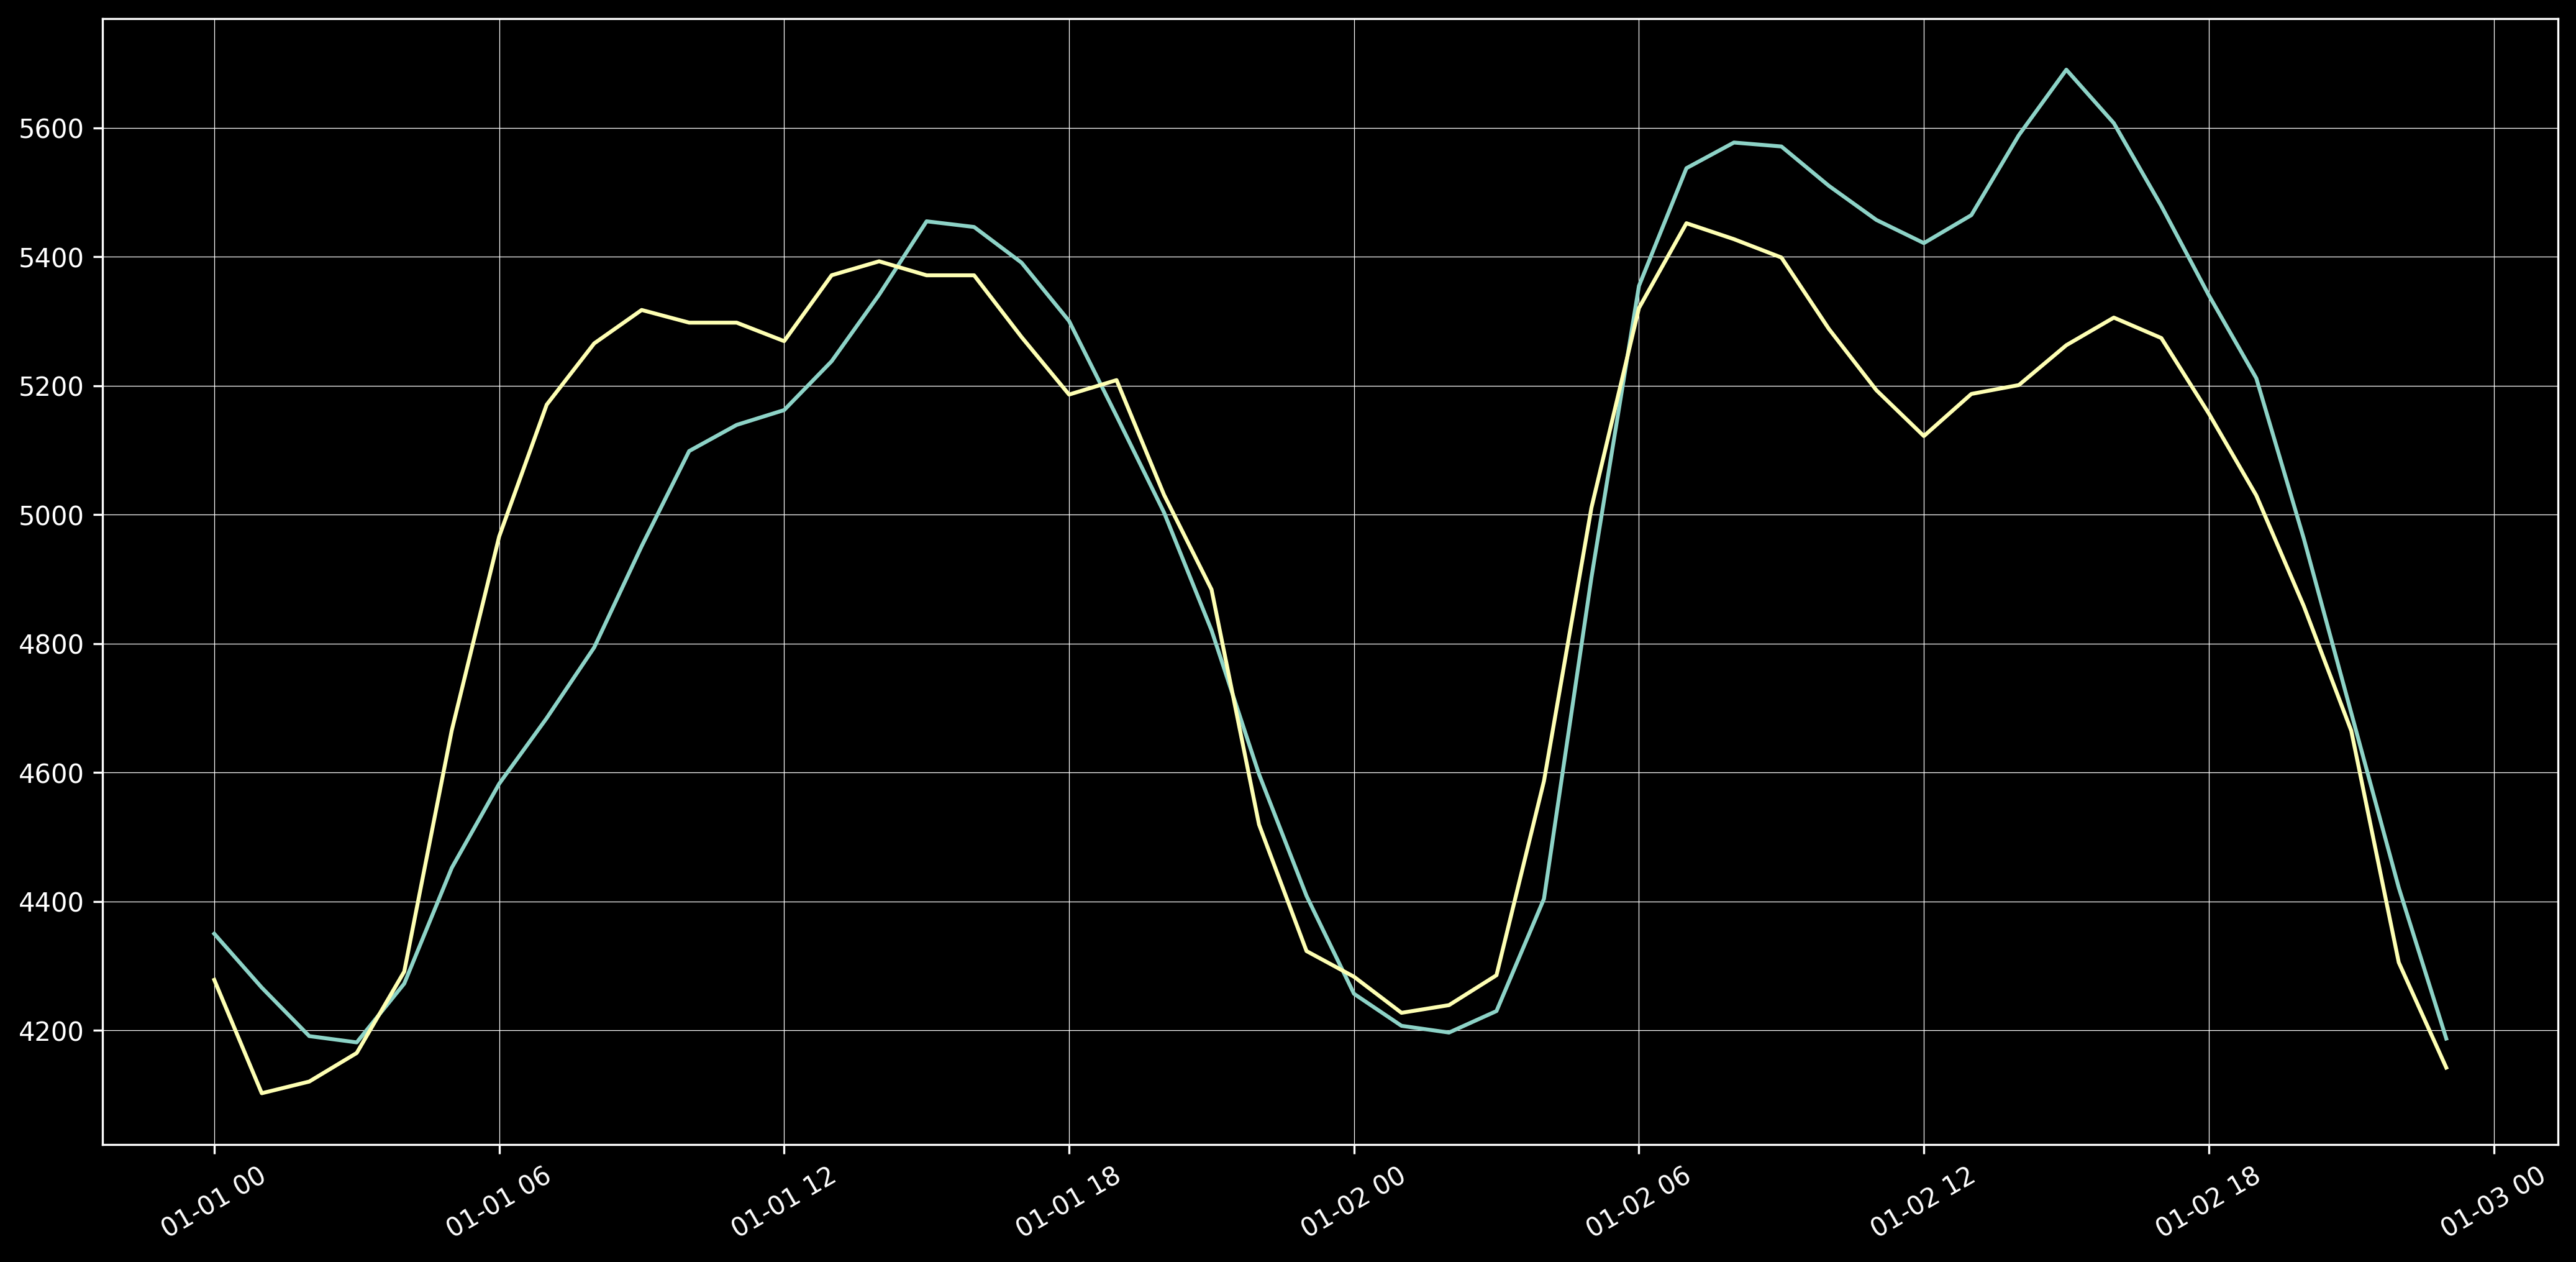

In [ ]:
plt.style.use('dark_background')
plt.rcParams.update({'figure.figsize': (17, 8), 'figure.dpi':300})
fig, ax = plt.subplots()
plt.plot(y_val)
plt.plot(x_val.index, xgb_pred)
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=30)

# CatBoostRegressor

In [ ]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
X = df_watt[train_cols]
y = df_watt['cons_actual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
train_dataset = cb.Pool(X_train, y_train)
test_dataset = cb.Pool(X_test, y_test)

all_data = cb.Pool(X, y)

catboost = cb.CatBoostRegressor()

params = {
    'max_depth': [3,6,12],
    'learning_rate' : [0.01, 0.05, 0.001],
    'iterations'    : [50, 150, 300]
}

random_cb_search = RandomizedSearchCV(estimator=catboost, param_distributions=params, scoring='neg_mean_squared_error', cv=5, n_iter=100)
random_cb_search.fit(X,y)

c:\Users\57859\.conda\envs\Informer\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0:	learn: 1360.3598364	total: 139ms	remaining: 6.81s
1:	learn: 1349.5048603	total: 143ms	remaining: 3.43s
2:	learn: 1338.9029306	total: 147ms	remaining: 2.29s
3:	learn: 1328.4306839	total: 149ms	remaining: 1.71s
4:	learn: 1318.0536781	total: 151ms	remaining: 1.36s
5:	learn: 1307.8148459	total: 153ms	remaining: 1.13s
6:	learn: 1297.7212610	total: 156ms	remaining: 959ms
7:	learn: 1287.4961872	total: 159ms	remaining: 835ms
8:	learn: 1277.5265201	total: 162ms	remaining: 737ms
9:	learn: 1267.8632852	total: 164ms	remaining: 656ms
10:	learn: 1258.1783757	total: 166ms	remaining: 590ms
11:	learn: 1248.3609434	total: 169ms	remaining: 534ms
12:	learn: 1238.9111402	total: 172ms	remaining: 489ms
13:	learn: 1229.3279623	total: 175ms	remaining: 450ms
14:	learn: 1219.7703805	total: 177ms	remaining: 414ms
15:	learn: 1210.5271060	total: 180ms	remaining: 382ms
16:	learn: 1201.4364447	total: 183ms	remaining: 355ms
17:	learn: 1192.4620704	total: 185ms	remaining: 329ms
18:	learn: 1183.2945769	total: 188ms	r

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000244404884A8>,
                   n_iter=100,
                   param_distributions={'iterations': [50, 150, 300],
                                        'learning_rate': [0.01, 0.05, 0.001],
                                        'max_depth': [3, 6, 12]},
                   scoring='neg_mean_squared_error')

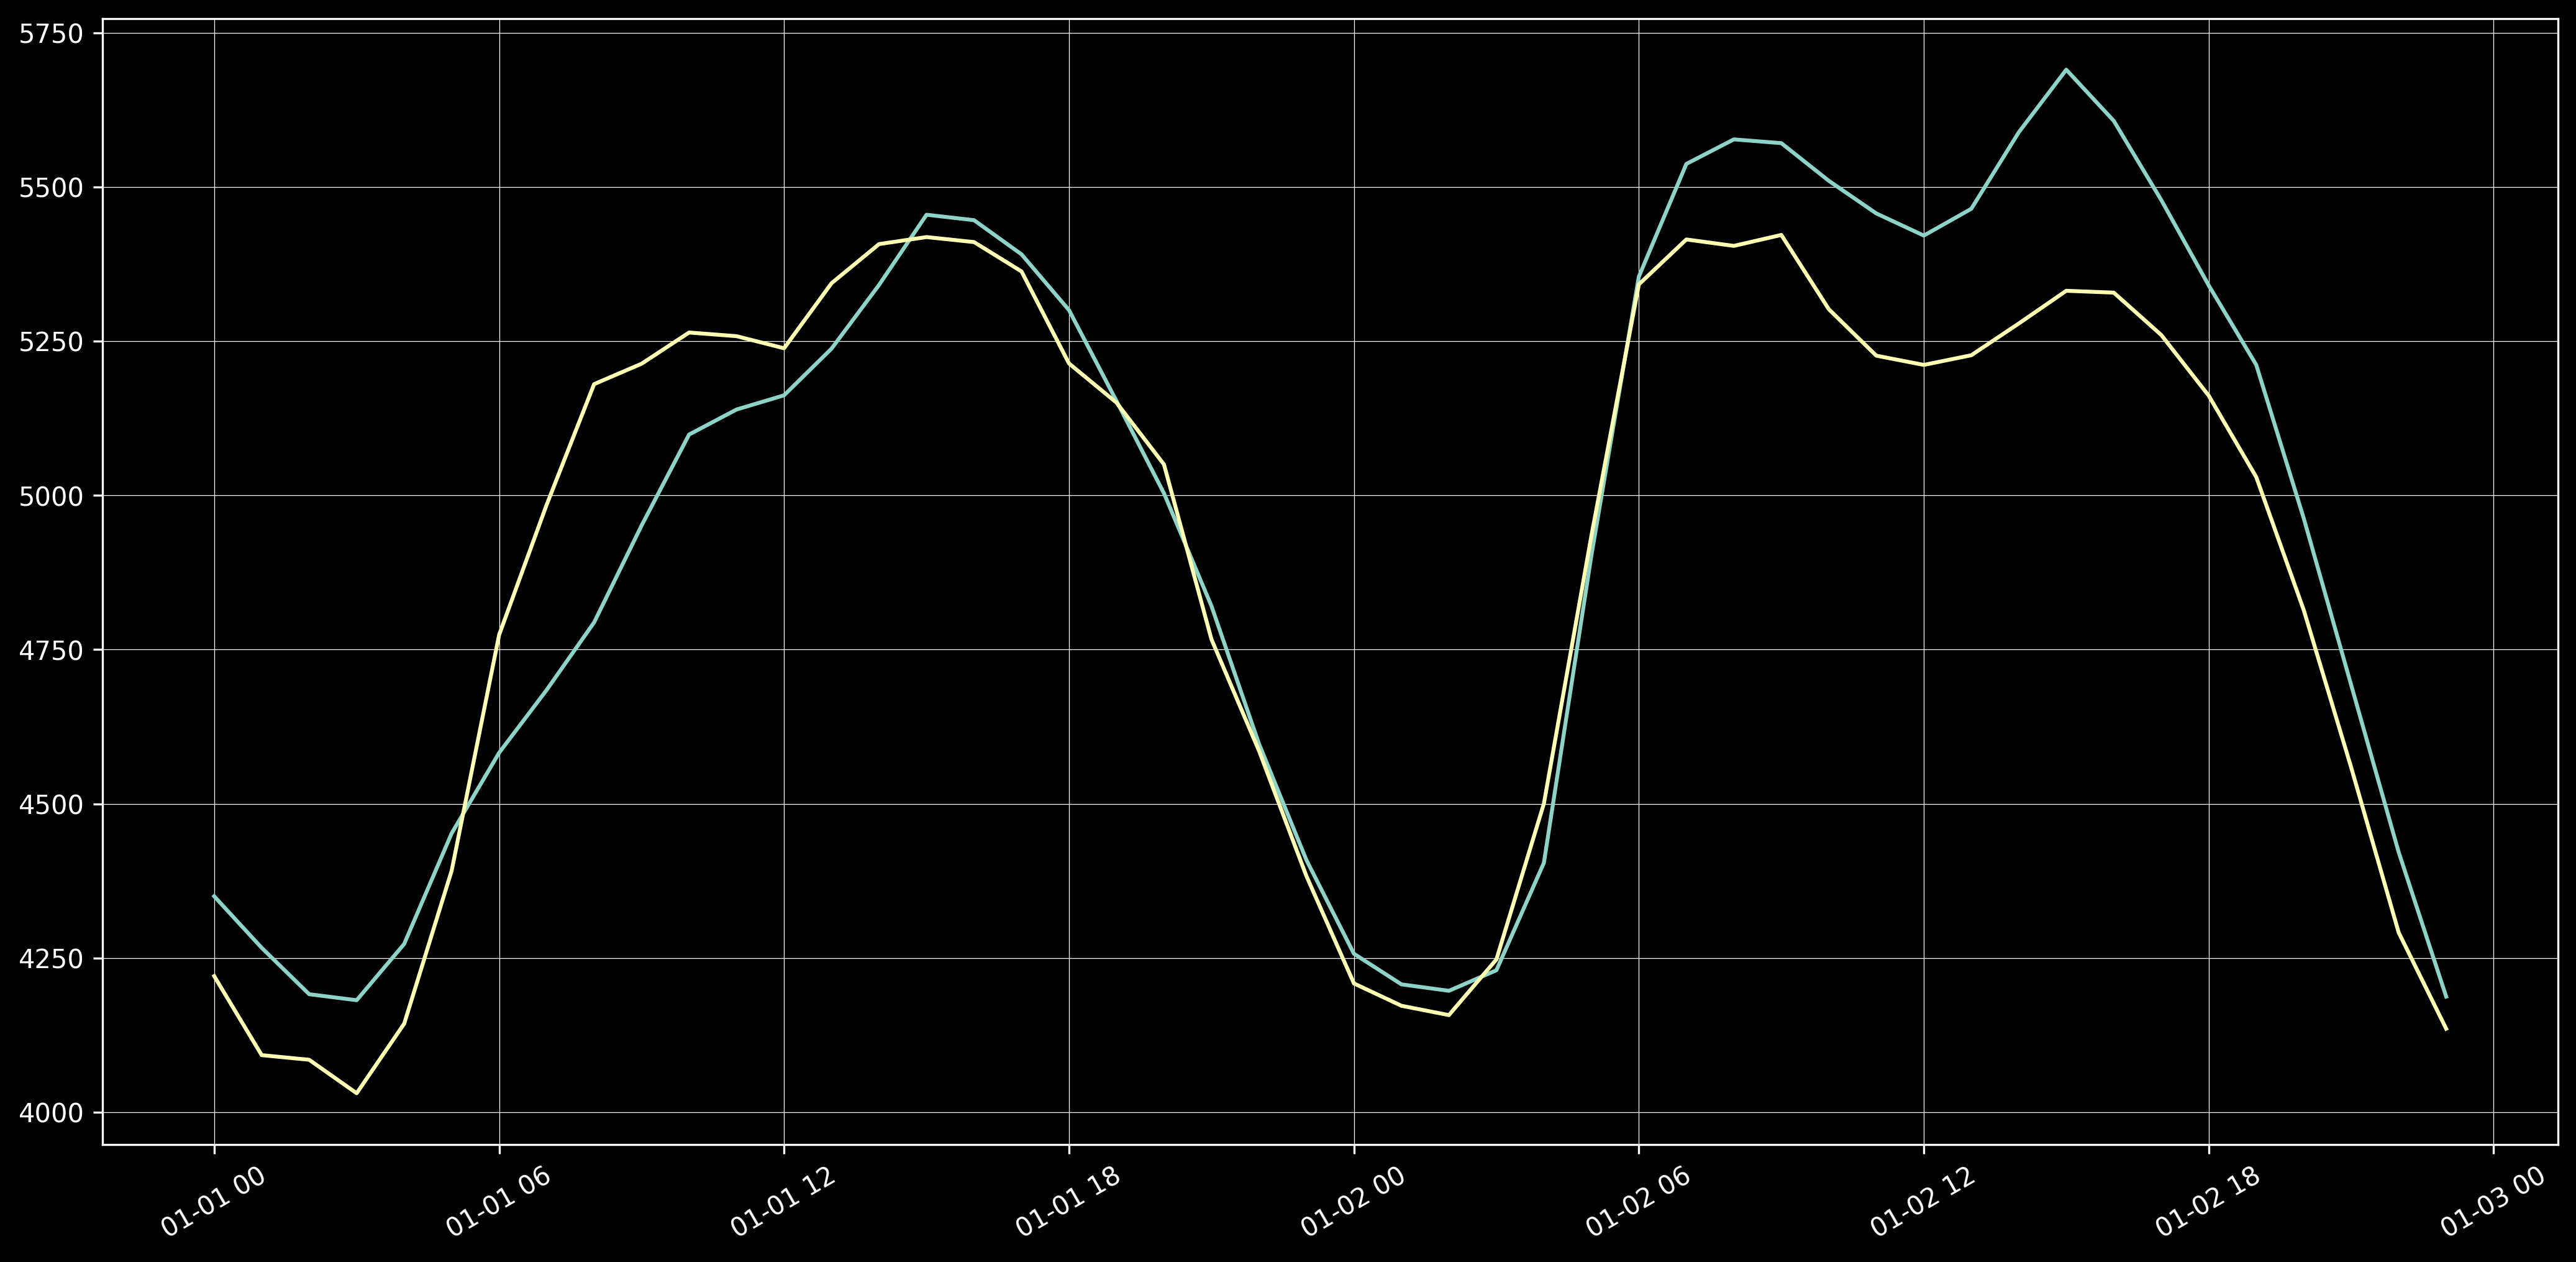

In [ ]:
cb_pred = random_cb_search.predict(x_val)

plt.style.use('dark_background')
plt.rcParams.update({'figure.figsize': (17, 8), 'figure.dpi':300})
fig, ax = plt.subplots()
plt.plot(y_val)
plt.plot(x_val.index, cb_pred)
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=30)

# Add skm prognose

In [ ]:
df_skm = pd.read_csv('Data/SKM Forbruksprognose 2014-2018.csv', sep=';')
df_skm = df_skm.set_index(['#Hour'])
df_skm2 = pd.read_csv('Data/SKM Forbruksprognose 2018-dd.csv', sep=';')
df_skm2 = df_skm2.set_index(['#Hour'])

def fix_date_csv_file(df):
    t = []
    for i in df.index:
        t.append(datetime.strptime(i, '%d.%m.%Y %H:%M'))
    df.index = t
    return df

df_skm, df_skm2 = fix_date_csv_file(df_skm), fix_date_csv_file(df_skm2)
df_skm_merged = pd.concat([df_skm,df_skm2], axis=0)
df_skm_merged = df_skm_merged[~df_skm_merged.index.duplicated(keep='first')]
df_skm = df_skm_merged[list(df_skm_merged.columns)] * 1000 #to get mwh
df_skm

CNPNO1_F  CNPNO5_F
2014-01-01 00:00:00    3930.0    1880.0
2014-01-01 01:00:00    3880.0    1850.0
2014-01-01 02:00:00    3830.0    1820.0
2014-01-01 03:00:00    3820.0    1800.0
2014-01-01 04:00:00    3830.0    1780.0
...                       ...       ...
2022-07-15 19:00:00    2690.0    1740.0
2022-07-15 20:00:00    2620.0    1770.0
2022-07-15 21:00:00    2530.0    1720.0
2022-07-15 22:00:00    2420.0    1660.0
2022-07-15 23:00:00    2370.0    1640.0

[74832 rows x 2 columns]

# Add volue prediction

In [ ]:
import wapi # wattsights egen pakke / den må installers via `pip install wapi-python`
import pandas as pd
import os
import numpy as np
from datetime import datetime 
from datetime import timedelta

# Create a session
# Dette forutsetter at dere har lagret volue credentials som miljøvariabler på PC'en deres og med navnet `WS_CLIENT_ID` og `WS_CLIENT_SECRET`
user = os.getenv("WS_CLIENT_ID")
password = os.getenv("WS_CLIENT_SECRET")
session = wapi.Session(client_id=user, client_secret=password)

start = "2020-01-01"
end = "2022-06-06"
periods=pd.date_range(start,end,freq='D')

# Retrieve volue prediction model
curves = [
    'con no1 ec00 mwh/h cet min15 f'
    ]



df_cons = pd.DataFrame()
for curve in curves:
    print(f"Working with {curve}")
    curve = session.get_curve(name=curve)
    curve_type = curve.curve_type
    res = []
    counter = 1
    if curve_type == 'TIME_SERIES':
        ts = curve.get_data(data_from=start, data_to=end, function='SAVERAGE', frequency='H')
        cons_temp = ts.to_pandas()
        df_cons = pd.merge(df_cons, cons_temp, left_index=True, right_index=True, how='outer')
        continue
    
    for j in range(len(periods)):
        if j == len(periods)-1:
            continue
        if curve_type == 'TAGGED_INSTANCES':
            ts_list = curve.search_instances(issue_date_from=periods[j],
                                 issue_date_to=periods[j+1],
                                 with_data=True, function='SAVERAGE', frequency='H', tags=['Avg'])
        else: #curve_type == 'INSTANCES'
            ts_list = curve.search_instances(issue_date_from=periods[j],
                                 issue_date_to=periods[j+1],
                                 with_data=True, function='SAVERAGE', frequency='H')
        # check if ts_list is empty and if yes, jump over that timestamp
        if not ts_list:
            continue
        pd_s = ts_list[0].to_pandas()
        if pd_s.empty:
            continue
        pd_s = pd_s.sort_index(ascending=True)
        pd_s = pd_s[:24]
        res.append(pd_s)
        print(f'Done {counter} out of {len(periods)}')
        counter += 1

    for k in range(len(res)):
        if k == 0:
            cons = pd.Series(res[k])
        else:
            cons = pd.concat([cons, res[k]])
    cons_temp = cons.rename(curve)
    df_cons = pd.merge(df_cons, cons_temp, left_index=True, right_index=True, how='outer')
df_cons

Working with con no1 ec00 mwh/h cet min15 f
Done 1 out of 888
Done 2 out of 888
Done 3 out of 888
Done 4 out of 888
Done 5 out of 888
Done 6 out of 888
Done 7 out of 888
Done 8 out of 888
Done 9 out of 888
Done 10 out of 888
Done 11 out of 888
Done 12 out of 888
Done 13 out of 888
Done 14 out of 888
Done 15 out of 888
Done 16 out of 888
Done 17 out of 888
Done 18 out of 888
Done 19 out of 888
Done 20 out of 888
Done 21 out of 888
Done 22 out of 888
Done 23 out of 888
Done 24 out of 888
Done 25 out of 888
Done 26 out of 888
Done 27 out of 888
Done 28 out of 888
Done 29 out of 888
Done 30 out of 888
Done 31 out of 888
Done 32 out of 888
Done 33 out of 888
Done 34 out of 888
Done 35 out of 888
Done 36 out of 888
Done 37 out of 888
Done 38 out of 888
Done 39 out of 888
Done 40 out of 888
Done 41 out of 888
Done 42 out of 888
Done 43 out of 888
Done 44 out of 888
Done 45 out of 888
Done 46 out of 888
Done 47 out of 888
Done 48 out of 888
Done 49 out of 888
Done 50 out of 888
Done 51 out of 

INSTANCES(con no1 ec00 mwh/h cet min15 f)
2019-12-31 23:00:00+01:00                                4731.117997
2020-01-01 00:00:00+01:00                                4543.996099
2020-01-01 01:00:00+01:00                                4326.677725
2020-01-01 02:00:00+01:00                                4082.942385
2020-01-01 03:00:00+01:00                                3979.324534
...                                                              ...
2022-06-05 19:00:00+02:00                                2515.580148
2022-06-05 20:00:00+02:00                                2560.067562
2022-06-05 21:00:00+02:00                                2608.348354
2022-06-05 22:00:00+02:00                                2568.354783
2022-06-05 23:00:00+02:00                                2527.011050

[21288 rows x 1 columns]

In [ ]:
#Remove first row (2019)
df_cons.columns = ['volue_cons']

t = np.array(df_cons.index)
for i, timestamp in enumerate(df_cons.index):
    t[i] = timestamp.tz_localize(tz=None)
df_cons.index = t

print(df_cons.index.dtype)

if df_cons.index[0] < datetime(2020,1,1,0,0,tzinfo=None):
    df_cons.index += timedelta(hours=1)

df_cons

datetime64[ns]


volue_cons
2020-01-01 00:00:00  4731.117997
2020-01-01 01:00:00  4543.996099
2020-01-01 02:00:00  4326.677725
2020-01-01 03:00:00  4082.942385
2020-01-01 04:00:00  3979.324534
...                          ...
2022-06-05 20:00:00  2515.580148
2022-06-05 21:00:00  2560.067562
2022-06-05 22:00:00  2608.348354
2022-06-05 23:00:00  2568.354783
2022-06-06 00:00:00  2527.011050

[21288 rows x 1 columns]

# Add X, y values to predict on

In [ ]:

#Definer ønsket kruver
curves = ["NO1_consumption_per_15min",
"NO1_temperature_per_15min",
"NO1_el_price_per_hour",
"NO1_cloud_coverage_per_15min"
]

#Definer start dato
start_dato = datetime(2020,1,1)
slutt_dato = datetime(2022,6,5)

df_lstm = pd.DataFrame()
for curve in curves:
    print(curve)
    hm = client.datapoints.retrieve_dataframe(
        start=start_dato,
        end=slutt_dato,
        aggregates=["average"],
        granularity="1h",
        id=client.time_series.retrieve(external_id=curve).id,)
    df_lstm = pd.merge(df_lstm, hm, left_index=True, right_index=True, how="outer")

# Add holidays
no_holidays = holidays.NO()
periods = pd.date_range(start_dato, slutt_dato, freq="H")
d = np.zeros(len(periods))
e = np.zeros(len(periods))

for l in range(len(periods)):
    a = str(int(periods[l].strftime('%Y%m%d')))

    da = int(a[-2:])
    mo = int(a[-4:-2])
    yr = int(a[-8:-4])
    if date(yr,mo,da) in no_holidays:
        d[l] = 1
    if date(yr,mo,da).weekday() > 4:
        e[l] = 1

df = pd.DataFrame(d,index=[i for i in periods],columns=['holiday?'])
ef = pd.DataFrame(e,index=[i for i in periods],columns=['weekend?'])

df_lstm = pd.merge(df_lstm, df, left_index=True, right_index=True, how='outer')
df_lstm = pd.merge(df_lstm, ef, left_index=True, right_index=True, how='outer')

df_lstm.columns = ["cons_actual","temp_forecast", "price_forecast", "cc_forecast", "holiday", "weekend"]

df_lstm['Seconds'] = df_lstm.index.map(pd.Timestamp.timestamp)
day = 60*60*24
year = 365.2425*day
week = day*7

df_lstm['Day sin'] = np.sin(df_lstm['Seconds'] * (2* np.pi / day))
df_lstm['Day cos'] = np.cos(df_lstm['Seconds'] * (2 * np.pi / day))
df_lstm['Week sin'] = np.sin(df_lstm['Seconds'] * (2 * np.pi / week))
df_lstm['Week cos'] = np.cos(df_lstm['Seconds'] * (2 * np.pi / week))
df_lstm['Year sin'] = np.sin(df_lstm['Seconds'] * (2 * np.pi / year))
df_lstm['Year cos'] = np.cos(df_lstm['Seconds'] * (2 * np.pi / year))

df_lstm=df_lstm.drop(['Seconds'], axis=1)

df_lstm.dropna(inplace=True)
df_lstm


NO1_consumption_per_15min
NO1_temperature_per_15min
NO1_el_price_per_hour
NO1_cloud_coverage_per_15min


cons_actual  temp_forecast  price_forecast  cc_forecast  \
2020-01-01 00:00:00  4350.041892         2.7250           31.77      1.00000   
2020-01-01 01:00:00  4266.511372         3.6000           31.57      1.00000   
2020-01-01 02:00:00  4191.281309         3.5875           31.28      1.00000   
2020-01-01 03:00:00  4181.534648         3.4500           30.72      0.99875   
2020-01-01 04:00:00  4272.687905         3.0625           30.27      0.98875   
...                          ...            ...             ...          ...   
2022-06-04 19:00:00  2501.500000        13.8250          172.58      0.99000   
2022-06-04 20:00:00  2498.750000        12.4500          168.75      0.99000   
2022-06-04 21:00:00  2446.250000        11.3125          163.27      0.98500   
2022-06-04 22:00:00  2373.750000        10.6125          144.50      0.93375   
2022-06-04 23:00:00  2282.000000         9.9375          142.03      0.80375   

                     holiday  weekend       Day sin   Day cos  Week sin  \
2020-01-01 00:00:00      1.0      0.0 -7.670342e-12  1.000000 -0.781831   
2020-01-01 01:00:00      1.0      0.0  2.588190e-01  0.965926 -0.757972   
2020-01-01 02:00:00      1.0      0.0  5.000000e-01  0.866025 -0.733052   
2020-01-01 03:00:00      1.0      0.0  7.071068e-01  0.707107 -0.707107   
2020-01-01 04:00:00      1.0      0.0  8.660254e-01  0.500000 -0.680173   
...                      ...      ...           ...       ...       ...   
2022-06-04 19:00:00      0.0      1.0 -9.659258e-01  0.258819  0.593820   
2022-06-04 20:00:00      0.0      1.0 -8.660254e-01  0.500000  0.563320   
2022-06-04 21:00:00      0.0      1.0 -7.071068e-01  0.707107  0.532032   
2022-06-04 22:00:00      0.0      1.0 -5.000000e-01  0.866025  0.500000   
2022-06-04 23:00:00      0.0      1.0 -2.588190e-01  0.965926  0.467269   

                     Week cos      Year sin  Year cos  
2020-01-01 00:00:00  0.623490 -2.150345e-03  0.999998  
2020-01-01 01:00:00  0.652287 -1.433564e-03  0.999999  
2020-01-01 02:00:00  0.680173 -7.167823e-04  1.000000  
2020-01-01 03:00:00  0.707107  1.964387e-15  1.000000  
2020-01-01 04:00:00  0.733052  7.167823e-04  1.000000  
...                       ...           ...       ...  
2022-06-04 19:00:00 -0.804598  4.547015e-01 -0.890644  
2022-06-04 20:00:00 -0.826239  4.540630e-01 -0.890970  
2022-06-04 21:00:00 -0.846724  4.534242e-01 -0.891295  
2022-06-04 22:00:00 -0.866025  4.527853e-01 -0.891620  
2022-06-04 23:00:00 -0.884115  4.521460e-01 -0.891944  

[21244 rows x 12 columns]

In [ ]:
df_lstm_safety_copy = df_lstm
df_cons_safety_copy = df_cons
print(df_lstm.index.dtype)
print(df_cons.index.dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
# merge dataframes
df_merged = pd.merge(df_cons, df_lstm, left_index=True, right_index=True)
df_merged.dropna(inplace=True)
df_merged

volue_cons  cons_actual  temp_forecast  price_forecast  \
2020-01-01 00:00:00  4731.117997  4350.041892         2.7250           31.77   
2020-01-01 01:00:00  4543.996099  4266.511372         3.6000           31.57   
2020-01-01 02:00:00  4326.677725  4191.281309         3.5875           31.28   
2020-01-01 03:00:00  4082.942385  4181.534648         3.4500           30.72   
2020-01-01 04:00:00  3979.324534  4272.687905         3.0625           30.27   
...                          ...          ...            ...             ...   
2022-06-04 19:00:00  2761.736280  2501.500000        13.8250          172.58   
2022-06-04 20:00:00  2731.567040  2498.750000        12.4500          168.75   
2022-06-04 21:00:00  2698.456645  2446.250000        11.3125          163.27   
2022-06-04 22:00:00  2687.114867  2373.750000        10.6125          144.50   
2022-06-04 23:00:00  2671.469666  2282.000000         9.9375          142.03   

                     cc_forecast  holiday  weekend       Day sin   Day cos  \
2020-01-01 00:00:00      1.00000      1.0      0.0 -7.670342e-12  1.000000   
2020-01-01 01:00:00      1.00000      1.0      0.0  2.588190e-01  0.965926   
2020-01-01 02:00:00      1.00000      1.0      0.0  5.000000e-01  0.866025   
2020-01-01 03:00:00      0.99875      1.0      0.0  7.071068e-01  0.707107   
2020-01-01 04:00:00      0.98875      1.0      0.0  8.660254e-01  0.500000   
...                          ...      ...      ...           ...       ...   
2022-06-04 19:00:00      0.99000      0.0      1.0 -9.659258e-01  0.258819   
2022-06-04 20:00:00      0.99000      0.0      1.0 -8.660254e-01  0.500000   
2022-06-04 21:00:00      0.98500      0.0      1.0 -7.071068e-01  0.707107   
2022-06-04 22:00:00      0.93375      0.0      1.0 -5.000000e-01  0.866025   
2022-06-04 23:00:00      0.80375      0.0      1.0 -2.588190e-01  0.965926   

                     Week sin  Week cos      Year sin  Year cos  
2020-01-01 00:00:00 -0.781831  0.623490 -2.150345e-03  0.999998  
2020-01-01 01:00:00 -0.757972  0.652287 -1.433564e-03  0.999999  
2020-01-01 02:00:00 -0.733052  0.680173 -7.167823e-04  1.000000  
2020-01-01 03:00:00 -0.707107  0.707107  1.964387e-15  1.000000  
2020-01-01 04:00:00 -0.680173  0.733052  7.167823e-04  1.000000  
...                       ...       ...           ...       ...  
2022-06-04 19:00:00  0.593820 -0.804598  4.547015e-01 -0.890644  
2022-06-04 20:00:00  0.563320 -0.826239  4.540630e-01 -0.890970  
2022-06-04 21:00:00  0.532032 -0.846724  4.534242e-01 -0.891295  
2022-06-04 22:00:00  0.500000 -0.866025  4.527853e-01 -0.891620  
2022-06-04 23:00:00  0.467269 -0.884115  4.521460e-01 -0.891944  

[21243 rows x 13 columns]

In [ ]:
X_unscaled = df_merged[list(df_merged.columns)[2:]]
y_unscaled = df_merged['cons_actual']
X_unscaled

temp_forecast  price_forecast  cc_forecast  holiday  \
2020-01-01 00:00:00         2.7250           31.77      1.00000      1.0   
2020-01-01 01:00:00         3.6000           31.57      1.00000      1.0   
2020-01-01 02:00:00         3.5875           31.28      1.00000      1.0   
2020-01-01 03:00:00         3.4500           30.72      0.99875      1.0   
2020-01-01 04:00:00         3.0625           30.27      0.98875      1.0   
...                            ...             ...          ...      ...   
2022-06-04 19:00:00        13.8250          172.58      0.99000      0.0   
2022-06-04 20:00:00        12.4500          168.75      0.99000      0.0   
2022-06-04 21:00:00        11.3125          163.27      0.98500      0.0   
2022-06-04 22:00:00        10.6125          144.50      0.93375      0.0   
2022-06-04 23:00:00         9.9375          142.03      0.80375      0.0   

                     weekend       Day sin   Day cos  Week sin  Week cos  \
2020-01-01 00:00:00      0.0 -7.670342e-12  1.000000 -0.781831  0.623490   
2020-01-01 01:00:00      0.0  2.588190e-01  0.965926 -0.757972  0.652287   
2020-01-01 02:00:00      0.0  5.000000e-01  0.866025 -0.733052  0.680173   
2020-01-01 03:00:00      0.0  7.071068e-01  0.707107 -0.707107  0.707107   
2020-01-01 04:00:00      0.0  8.660254e-01  0.500000 -0.680173  0.733052   
...                      ...           ...       ...       ...       ...   
2022-06-04 19:00:00      1.0 -9.659258e-01  0.258819  0.593820 -0.804598   
2022-06-04 20:00:00      1.0 -8.660254e-01  0.500000  0.563320 -0.826239   
2022-06-04 21:00:00      1.0 -7.071068e-01  0.707107  0.532032 -0.846724   
2022-06-04 22:00:00      1.0 -5.000000e-01  0.866025  0.500000 -0.866025   
2022-06-04 23:00:00      1.0 -2.588190e-01  0.965926  0.467269 -0.884115   

                         Year sin  Year cos  
2020-01-01 00:00:00 -2.150345e-03  0.999998  
2020-01-01 01:00:00 -1.433564e-03  0.999999  
2020-01-01 02:00:00 -7.167823e-04  1.000000  
2020-01-01 03:00:00  1.964387e-15  1.000000  
2020-01-01 04:00:00  7.167823e-04  1.000000  
...                           ...       ...  
2022-06-04 19:00:00  4.547015e-01 -0.890644  
2022-06-04 20:00:00  4.540630e-01 -0.890970  
2022-06-04 21:00:00  4.534242e-01 -0.891295  
2022-06-04 22:00:00  4.527853e-01 -0.891620  
2022-06-04 23:00:00  4.521460e-01 -0.891944  

[21243 rows x 11 columns]

# Make predictions

In [ ]:
xgb_predictions = random_search.predict(X_unscaled)
cb_predictions = random_cb_search.predict(X_unscaled)
volue_predictions = df_cons['volue_cons']
cb_predictions.shape, xgb_predictions.shape

((21243,), (21243,))

In [ ]:
# make the dataframe
df_lstm = pd.DataFrame(index=df_merged.index, data={
                                            'actual': df_merged['cons_actual'],
                                            'xgb': xgb_predictions,
                                            'cbr': cb_predictions,
                                            'volue': df_merged['volue_cons']
                                            })

df_lstm = pd.merge(df_skm, df_lstm, left_index=True, right_index=True)

In [ ]:
df_lstm = df_lstm[['actual', 'CNPNO1_F',	'CNPNO5_F',	'xgb',	'cbr',	'volue']]
df_lstm

actual  CNPNO1_F  CNPNO5_F          xgb  \
2020-01-01 00:00:00  4350.041892    4160.0    2000.0  4278.492676   
2020-01-01 01:00:00  4266.511372    4080.0    1980.0  4102.646973   
2020-01-01 02:00:00  4191.281309    4010.0    1960.0  4120.769043   
2020-01-01 03:00:00  4181.534648    3960.0    1920.0  4165.113281   
2020-01-01 04:00:00  4272.687905    3980.0    1920.0  4291.329102   
...                          ...       ...       ...          ...   
2022-06-04 19:00:00  2501.500000    2630.0    1760.0  2745.374023   
2022-06-04 20:00:00  2498.750000    2590.0    1750.0  2623.137451   
2022-06-04 21:00:00  2446.250000    2520.0    1730.0  2479.972656   
2022-06-04 22:00:00  2373.750000    2500.0    1710.0  2362.593750   
2022-06-04 23:00:00  2282.000000    2440.0    1660.0  2172.122559   

                             cbr        volue  
2020-01-01 00:00:00  4220.608083  4731.117997  
2020-01-01 01:00:00  4092.486590  4543.996099  
2020-01-01 02:00:00  4084.972537  4326.677725  
2020-01-01 03:00:00  4030.704308  4082.942385  
2020-01-01 04:00:00  4143.395878  3979.324534  
...                          ...          ...  
2022-06-04 19:00:00  2842.259022  2761.736280  
2022-06-04 20:00:00  2810.756569  2731.567040  
2022-06-04 21:00:00  2651.548663  2698.456645  
2022-06-04 22:00:00  2470.299622  2687.114867  
2022-06-04 23:00:00  2348.003904  2671.469666  

[21243 rows x 6 columns]

# LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor

def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 1:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit(df_lstm)
df_lstm_scaled = df_lstm
df_lstm_scaled = scaled.transform(df_lstm_scaled)

trainX,trainY=createXY(df_lstm_scaled[:-3000],26)
testX,testY=createXY(df_lstm_scaled[-3000:],26)
trainX.shape, testY.shape

((18217, 26, 5), (2974,))

In [ ]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import GRU
import itertools


def LSTM_HyperParameter_Tuning(config, x_train, y_train, x_test, y_test):
    
    first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer, third_additional_layer,
                                                  n_neurons, n_batch_size, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        regressor = Sequential()
        regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout))

        if first_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if second_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if third_additional_layer:
            regressor.add(GRU(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        regressor.add(LSTM(units=n_neurons, return_sequences=False))
        regressor.add(Dropout(dropout))
        regressor.add(Dense(units=1, activation='linear'))
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        '''''
        From the mentioned article above --> If a validation dataset is specified to the fit() function via the validation_data or v
        alidation_split arguments,then the loss on the validation dataset will be made available via the name “val_loss.”
        '''''

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

        '''''
        cb = Callback(...)  # First, callbacks must be instantiated.
        cb_list = [cb, ...]  # Then, one or more callbacks that you intend to use must be added to a Python list.
        model.fit(..., callbacks=cb_list)  # Finally, the list of callbacks is provided to the callback argument when fitting the model.
        '''''

        regressor.fit(x_train, y_train, validation_split=0.2, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

        # load the best model
        # regressor = load_model('best_model.h5')

        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)

        hist.append(list((first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist

In [ ]:
config = [[False], [False], [False], [16, 32], [8, 16, 32], [0.2]]  

# list of lists --> [[first_additional_layer], [second_additional_layer], [third_additional_layer], [n_neurons], [n_batch_size], [dropout]]

hist = LSTM_HyperParameter_Tuning(config, trainX, trainY, testX, testY)  # change x_train shape

[(False, False, False, 16, 8, 0.2), (False, False, False, 16, 16, 0.2), (False, False, False, 16, 32, 0.2), (False, False, False, 32, 8, 0.2), (False, False, False, 32, 16, 0.2), (False, False, False, 32, 32, 0.2)]


1th combination: 

--------------------------------------------------------------------

Epoch 00001: val_loss improved from inf to 0.00332, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.00332 to 0.00269, saving model to best_model.h5

Epoch 00003: val_loss did not improve from 0.00269

Epoch 00004: val_loss did not improve from 0.00269

Epoch 00005: val_loss improved from 0.00269 to 0.00115, saving model to best_model.h5

Epoch 00006: val_loss did not improve from 0.00115

Epoch 00007: val_loss improved from 0.00115 to 0.00099, saving model to best_model.h5

Epoch 00008: val_loss improved from 0.00099 to 0.00089, saving model to best_model.h5

Epoch 00009: val_loss did not improve from 0.00089

Epoch 00010: val_loss did not improve from 0.00089

Epo

In [ ]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=[7], ascending=True)
hist


0      1      2   3   4    5  \
0  False  False  False  16   8  0.2   
1  False  False  False  16  16  0.2   
3  False  False  False  32   8  0.2   
4  False  False  False  32  16  0.2   
5  False  False  False  32  32  0.2   
2  False  False  False  16  32  0.2   

                                               6  \
0  [0.0008756512543186545, 0.029591405764222145]   
1  [0.0010114222532138228, 0.031802866607904434]   
3   [0.0009220413630828261, 0.03036513365805149]   
4    [0.001035573659464717, 0.03218033164739609]   
5  [0.0010318440617993474, 0.032122328877449036]   
2  [0.0010982046369463205, 0.033139169216156006]   

                                              7  
0  [0.0015618241159245372, 0.03951992094516754]  
1   [0.0016319986898452044, 0.0403980053961277]  
3   [0.001908382517285645, 0.04368503764271736]  
4   [0.002401447854936123, 0.04900456964969635]  
5  [0.0024626338854432106, 0.04962493106722832]  
2   [0.002514877123758197, 0.05014855042099953]

In [ ]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[0, 0]}\n second_additional_layer = {hist.iloc[0, 1]}\n third_additional_layer = {hist.iloc[0, 2]}\n n_neurons = {hist.iloc[0, 3]}\n n_batch_size = {hist.iloc[0, 4]}\n dropout = {hist.iloc[0, 5]}')


Best Combination: 
 first_additional_layer = False
 second_additional_layer = False
 third_additional_layer = False
 n_neurons = 16
 n_batch_size = 8
 dropout = 0.2


# Load model and plot results

In [ ]:
from keras.models import load_model
import pandas as pd
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import GRU
import itertools
from sklearn.preprocessing import MinMaxScaler
import wapi # wattsights egen pakke / den må installers via `pip install wapi-python`
import pandas as pd
import os
import numpy as np
from datetime import datetime
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from msal import PublicClientApplication
from cognite.client import CogniteClient
from cognite.client.data_classes import TimeSeries, Asset
import holidays
from datetime import date



loaded_model = load_model('best_model.h5')

In [ ]:
start2 = "2022-06-06"
end2 = "2022-06-09"
period2=pd.date_range(start2,end2,freq='D')

# Retrieve volue prediction model
curves = [
    'con no1 ec00 mwh/h cet min15 f'
    ]

# Create a session
# Dette forutsetter at dere har lagret volue credentials som miljøvariabler på PC'en deres og med navnet `WS_CLIENT_ID` og `WS_CLIENT_SECRET`
user = os.getenv("WS_CLIENT_ID")
password = os.getenv("WS_CLIENT_SECRET")
session = wapi.Session(client_id=user, client_secret=password)

df_cons_2 = pd.DataFrame()
for curve in curves:
    print(f"Working with {curve}")
    curve = session.get_curve(name=curve)
    curve_type = curve.curve_type
    res = []
    counter = 1
    if curve_type == 'TIME_SERIES':
        ts = curve.get_data(data_from=start2, data_to=end2, function='SAVERAGE', frequency='H')
        cons_2_temp = ts.to_pandas()
        df_cons_2 = pd.merge(df_cons_2, cons_2_temp, left_index=True, right_index=True, how='outer')
        continue
    
    for j in range(len(period2)):
        if j == len(period2)-1:
            continue
        if curve_type == 'TAGGED_INSTANCES':
            ts_list = curve.search_instances(issue_date_from=period2[j],
                                 issue_date_to=period2[j+1],
                                 with_data=True, function='SAVERAGE', frequency='H', tags=['Avg'])
        else: #curve_type == 'INSTANCES'
            ts_list = curve.search_instances(issue_date_from=period2[j],
                                 issue_date_to=period2[j+1],
                                 with_data=True, function='SAVERAGE', frequency='H')
        # check if ts_list is empty and if yes, jump over that timestamp
        if not ts_list:
            continue
        pd_s = ts_list[0].to_pandas()
        if pd_s.empty:
            continue
        pd_s = pd_s.sort_index(ascending=True)
        pd_s = pd_s[:24]
        res.append(pd_s)
        print(f'Done {counter} out of {len(period2)}')
        counter += 1

    for k in range(len(res)):
        if k == 0:
            cons_2 = pd.Series(res[k])
        else:
            cons_2 = pd.concat([cons_2, res[k]])
    cons_2_temp = cons_2.rename(curve)
    df_cons_2 = pd.merge(df_cons_2, cons_2_temp, left_index=True, right_index=True, how='outer')

Working with con no1 ec00 mwh/h cet min15 f
Done 1 out of 4
Done 2 out of 4
Done 3 out of 4


In [ ]:
df_skm_new = pd.read_csv('Data/SKM Forbruksprognose 2014-2018.csv', sep=';')
df_skm_new = df_skm_new.set_index(['#Hour'])
df_skm_new2 = pd.read_csv('Data/SKM Forbruksprognose 2018-dd.csv', sep=';')
df_skm_new2 = df_skm_new2.set_index(['#Hour'])

def fix_date_csv_file(df):
    t = []
    for i in df.index:
        t.append(datetime.strptime(i, '%d.%m.%Y %H:%M'))
    df.index = t
    return df

df_skm_new, df_skm_new2 = fix_date_csv_file(df_skm_new), fix_date_csv_file(df_skm_new2)
df_skm_new_merged = pd.concat([df_skm_new,df_skm_new2], axis=0)
df_skm_new_merged = df_skm_new_merged[~df_skm_new_merged.index.duplicated(keep='first')]
df_skm_new = df_skm_new_merged[list(df_skm_new_merged.columns)] * 1000 #to get mwh

In [ ]:
# Log-in detaljer
TENANT_ID = os.getenv("AZURE_TENANT_ID")
CLIENT_ID = os.getenv("AZURE_CLIENT_ID")
CDF_CLUSTER = "az-power-no-northeurope"
COGNITE_PROJECT = "heco-dev"

# Code to log-in WIHTOUT client_secret
SCOPES = [f"https://{CDF_CLUSTER}.cognitedata.com/.default"]

AUTHORITY_HOST_URI = "https://login.microsoftonline.com"
AUTHORITY_URI = AUTHORITY_HOST_URI + "/" + TENANT_ID
PORT = 53000


def authenticate_azure():

    app = PublicClientApplication(client_id=CLIENT_ID, authority=AUTHORITY_URI)

    # interactive login - make sure you have http://localhost:port in Redirect URI in App Registration as type "Mobile and desktop applications"
    creds = app.acquire_token_interactive(scopes=SCOPES, port=PORT)
    return creds

creds = authenticate_azure()

client = CogniteClient(
    token_url=creds["id_token_claims"]["iss"],
    token=creds["access_token"],
    token_client_id=creds["id_token_claims"]["aud"],
    project=COGNITE_PROJECT,
    base_url=f"https://{CDF_CLUSTER}.cognitedata.com",
    client_name="cognite-python-dev",
)


#Definer ønsket kruver
curves2 = ["NO1_consumption_per_15min",
"NO1_temperature_per_15min",
"NO1_el_price_per_hour",
"NO1_cloud_coverage_per_15min"
]

start_dato2 = datetime(2022,6,6)
slutt_dato2 = datetime(2022,6,9)

df_lstm_2 = pd.DataFrame()
for curve in curves2:
    print(curve)
    hm = client.datapoints.retrieve_dataframe(
        start=start_dato2,
        end=slutt_dato2,
        aggregates=["average"],
        granularity="1h",
        id=(client.time_series.retrieve(external_id=curve)).id)
    df_lstm_2 = pd.merge(df_lstm_2, hm, left_index=True, right_index=True, how="outer")

# Add holidays
no_holidays = holidays.NO()
periods = pd.date_range(start_dato2, slutt_dato2, freq="H")
d = np.zeros(len(periods))
e = np.zeros(len(periods))

for l in range(len(periods)):
    a = str(int(periods[l].strftime('%Y%m%d')))

    da = int(a[-2:])
    mo = int(a[-4:-2])
    yr = int(a[-8:-4])
    if date(yr,mo,da) in no_holidays:
        d[l] = 1
    if date(yr,mo,da).weekday() > 4:
        e[l] = 1

df = pd.DataFrame(d,index=[i for i in periods],columns=['holiday?'])
ef = pd.DataFrame(e,index=[i for i in periods],columns=['weekend?'])

df_lstm_2 = pd.merge(df_lstm_2, df, left_index=True, right_index=True, how='outer')
df_lstm_2 = pd.merge(df_lstm_2, ef, left_index=True, right_index=True, how='outer')

df_lstm_2.columns = ["cons_actual","temp_forecast", "price_forecast", "cc_forecast", "holiday", "weekend"]

df_lstm_2['Seconds'] = df_lstm_2.index.map(pd.Timestamp.timestamp)
day = 60*60*24
year = 365.2425*day
week = day*7

df_lstm_2['Day sin'] = np.sin(df_lstm_2['Seconds'] * (2* np.pi / day))
df_lstm_2['Day cos'] = np.cos(df_lstm_2['Seconds'] * (2 * np.pi / day))
df_lstm_2['Week sin'] = np.sin(df_lstm_2['Seconds'] * (2 * np.pi / week))
df_lstm_2['Week cos'] = np.cos(df_lstm_2['Seconds'] * (2 * np.pi / week))
df_lstm_2['Year sin'] = np.sin(df_lstm_2['Seconds'] * (2 * np.pi / year))
df_lstm_2['Year cos'] = np.cos(df_lstm_2['Seconds'] * (2 * np.pi / year))

df_lstm_2=df_lstm_2.drop(['Seconds'], axis=1)

df_lstm_2.dropna(inplace=True)

df_lstm_2_safety_copy = df_lstm_2
df_cons_2_safety_copy = df_cons_2

#Remove first row (2019)
df_cons_2.columns = ['volue_cons']

t = np.array(df_cons_2.index)
for i, timestamp in enumerate(df_cons_2.index):
    t[i] = (timestamp.tz_localize(tz=None))
df_cons_2.index = t

print(df_cons_2.index.dtype)

if df_cons_2.index[0] < datetime(2020,1,1,0,0,tzinfo=None):
    df_cons_2.index += timedelta(hours=1)

df_merged_2 = pd.merge(df_cons_2, df_lstm_2, left_index=True, right_index=True)
df_merged_2.dropna(inplace=True)

X_unscaled_2 = df_merged_2[list(df_merged_2.columns)[2:]]
y_unscaled_2 = df_merged_2['cons_actual']

xgb_predictions_2 = random_search.predict(X_unscaled_2)
cb_predictions_2 = random_cb_search.predict(X_unscaled_2)
volue_predictions_2 = df_cons_2['volue_cons']
cb_predictions_2.shape, xgb_predictions_2.shape


# make the dataframe
df_lstm_2 = pd.DataFrame(index=df_merged_2.index, data={
                                            'actual': df_merged_2['cons_actual'],
                                            'xgb': xgb_predictions_2,
                                            'cbr': cb_predictions_2,
                                            'volue': df_merged_2['volue_cons']
                                            })

df_lstm_2 = pd.merge(df_skm_new, df_lstm_2, left_index=True, right_index=True)
df_lstm_2 = df_lstm_2[['actual', 'CNPNO1_F',	'CNPNO5_F',	'xgb',	'cbr',	'volue']]

NO1_consumption_per_15min
NO1_temperature_per_15min
NO1_el_price_per_hour
NO1_cloud_coverage_per_15min
datetime64[ns]


In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 1:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit(df_lstm_2)
df_lstm_scaled2 = df_lstm_2
df_lstm_scaled2 = scaled.transform(df_lstm_scaled2)

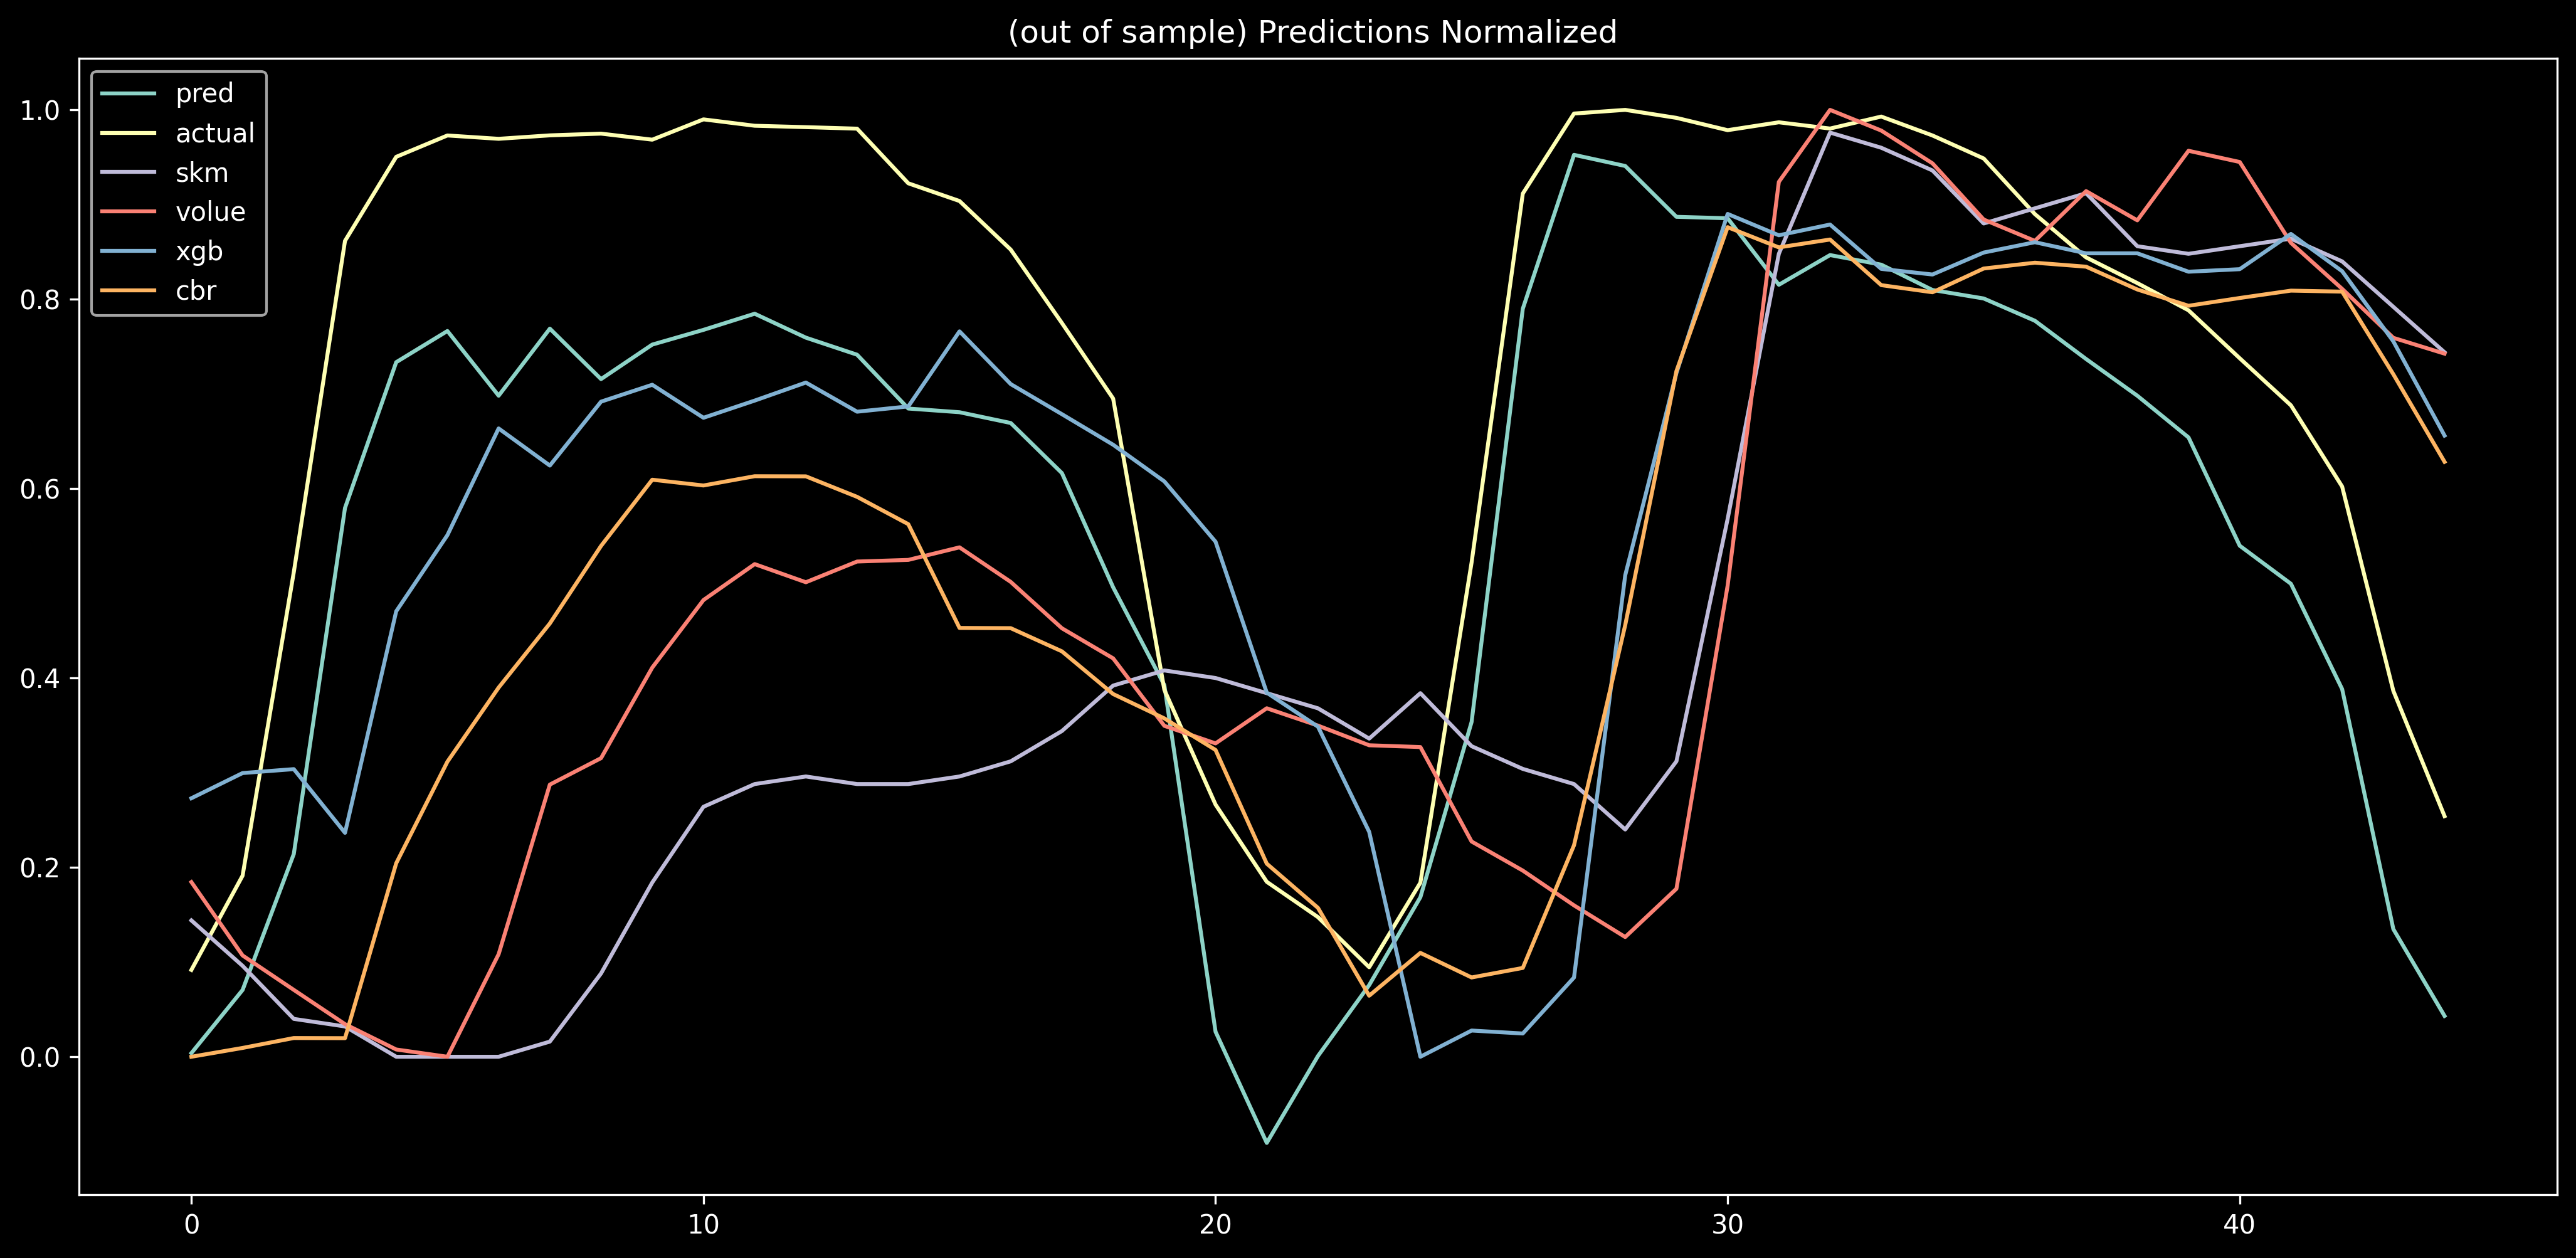

In [ ]:
lstm_val_x, lstm_val_y = createXY(df_lstm_scaled2, 26)

lstm_pred = loaded_model.predict(lstm_val_x)

#Inverse transform
plt.title('(out of sample) Predictions Normalized ')
plt.plot(lstm_pred, label='pred')
plt.plot(lstm_val_y, label='actual')
plt.plot(df_lstm_scaled2[:-26,1], label='skm')
plt.plot(df_lstm_scaled2[:-26,5], label='volue')
plt.plot(df_lstm_scaled2[:-26,3], label='xgb')
plt.plot(df_lstm_scaled2[:-26,4], label='cbr')

plt.legend()

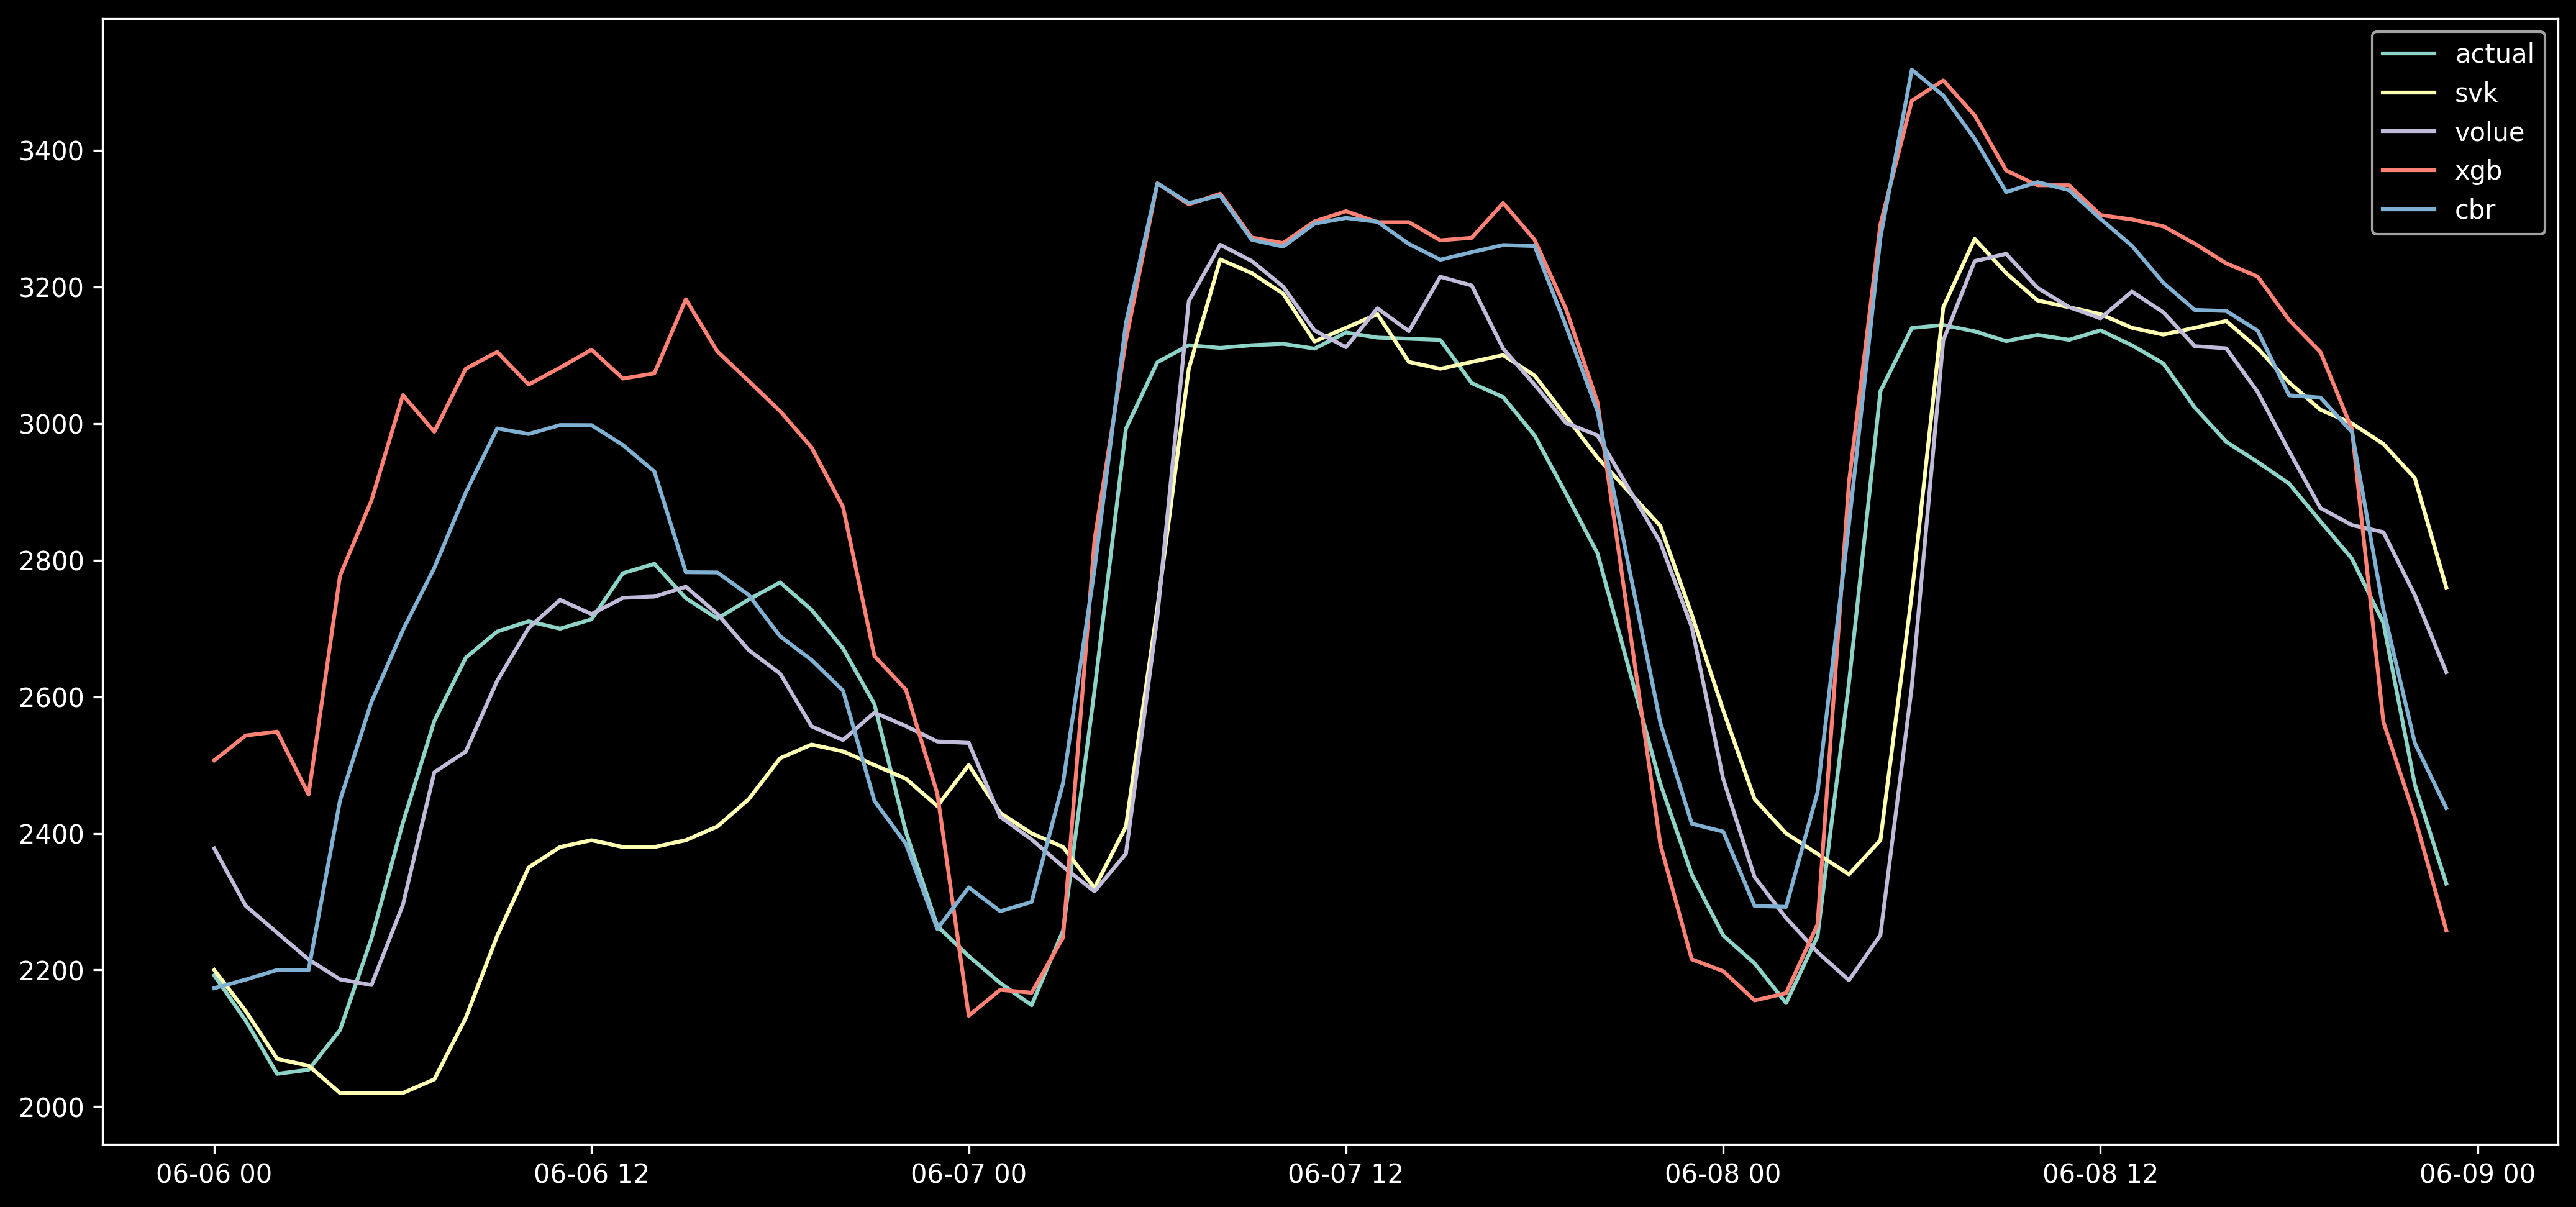

In [ ]:
plt.plot(df_lstm_2['actual'], label='actual')
plt.plot(df_lstm_2['CNPNO1_F'], label='svk')
plt.plot(df_lstm_2['volue'], label='volue')
plt.plot(df_lstm_2['xgb'], label='xgb')
plt.plot(df_lstm_2['cbr'], label='cbr')
plt.legend()


# FIX TIMEZONES!

# Evaluation